### Housing Price 
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 


Also, determine the optimal value of lambda for ridge and lasso regression.

In [220]:
# data manipulation and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
pd.pandas.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso,Ridge
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error,r2_score
import joblib

In [3]:
data=pd.read_csv('train.csv')
print(data.shape)
data.head()

(1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
# drop id, it is just a number given to identify each house
data.drop('Id',axis=1,inplace=True)

In [5]:
data.shape

(1460, 80)

The house price dataset contains 1460 rows, that is, houses, and 80 columns, i.e., variables. 

79 are predictive variables and 1 is the target variable: SalePrice

## Analysis

**We will analyse the following:**

1. The target variable
2. Variable types (categorical and numerical)
3. Missing data
4. Numerical variables
    - Discrete
    - Continuous
    - Distributions
    - Transformations

5. Categorical variables
    - Cardinality
    - Rare Labels
    - Special mappings
    
6. Additional Reading Resources

## Target

Let's begin by exploring the target distribution.

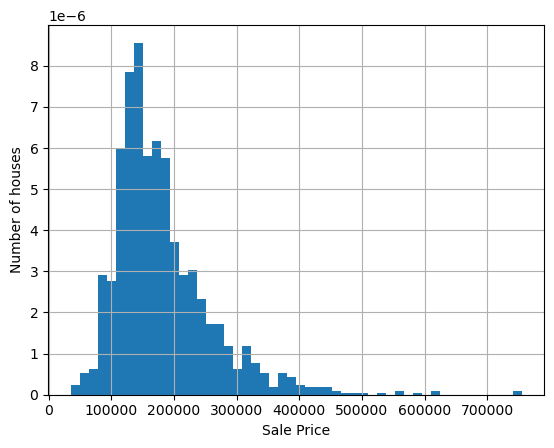

In [6]:
data['SalePrice'].hist(bins=50,density=True)
plt.ylabel('Number of houses')
plt.xlabel('Sale Price')
plt.show()

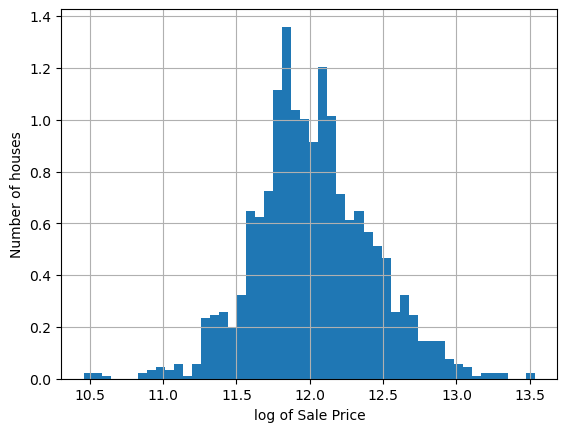

In [7]:
# lets  transform the target using log
np.log(data['SalePrice']).hist(bins=50,density=True)
plt.ylabel('Number of houses')
plt.xlabel('log of Sale Price')
plt.show()

## Variable Types
Next, let's identify the categorical and numerical variables

In [10]:
cat_vars=[var for var in data.columns if data[var].dtype=='O']
cat_vars=cat_vars+['MSSubClass']
len(cat_vars)

44

In [11]:
data[cat_vars]=data[cat_vars].astype('O')

In [12]:
num_vars=[var for var in data.columns if var not in cat_vars and var !='SalePrice' ]

In [13]:
len(num_vars)

35

# Missing values
find out which variables of the dataset contain missing values.

In [14]:
vars_with_na=[var for var in data.columns if data[var].isnull().sum()>0]
data[vars_with_na].isnull().mean().sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64

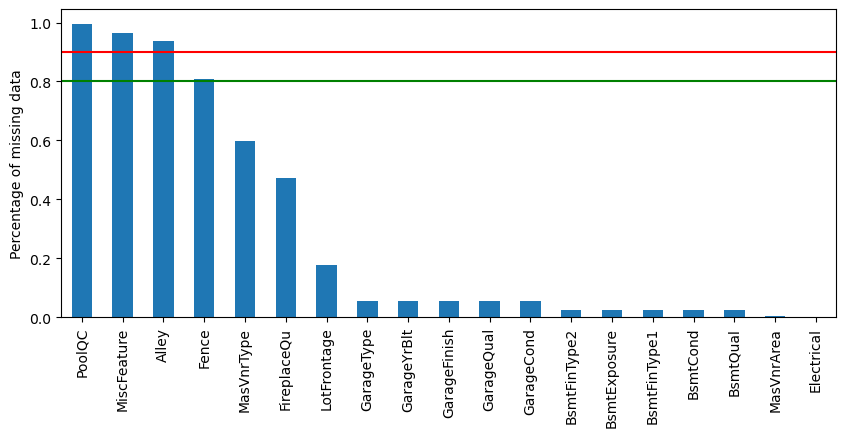

In [15]:
data[vars_with_na].isnull().mean().sort_values(ascending=False).plot.bar(figsize=(10,4))
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.90,color='r',linestyle='-')
plt.axhline(y=0.80,color='g',linestyle='-')
plt.show()

In [16]:
cat_na=[var for var in cat_vars if var in vars_with_na]
num_na=[var for var in num_vars if var in vars_with_na]
print('Number of categorical variables with na: ', len(cat_na))
print('Number of numerical variables with na: ', len(num_na))

Number of categorical variables with na:  16
Number of numerical variables with na:  3


In [17]:
num_na

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [18]:
cat_na

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

## Relationship between missing data and Sale Price

Evaluate the price of the house in those observations where the information is missing. We will do this for each variable that shows missing data.

In [19]:
def analyse_na_value(df,var):
    df=df.copy()
    df[var]=np.where(df[var].isnull(),1,0)
    tmp=df.groupby(var)['SalePrice'].agg(['mean','std'])
    tmp.plot(kind='barh',y='mean',legend=False,
             xerr='std',title='Sale price',color='blue')
    plt.show()
    

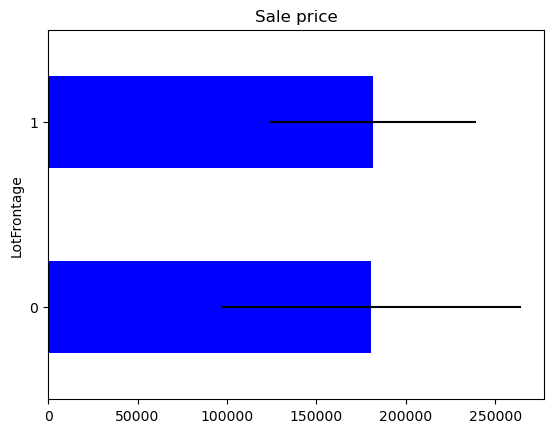

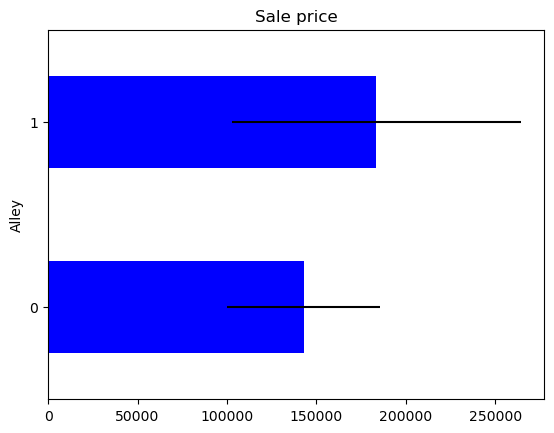

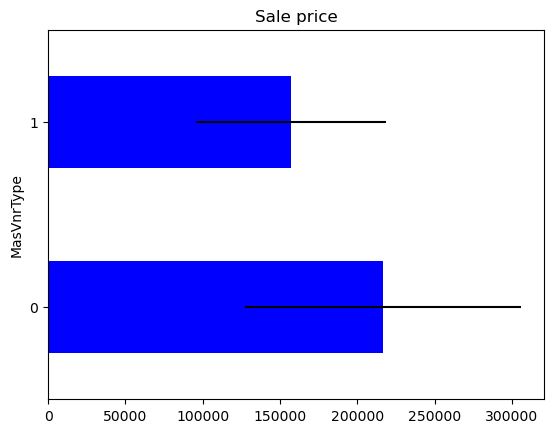

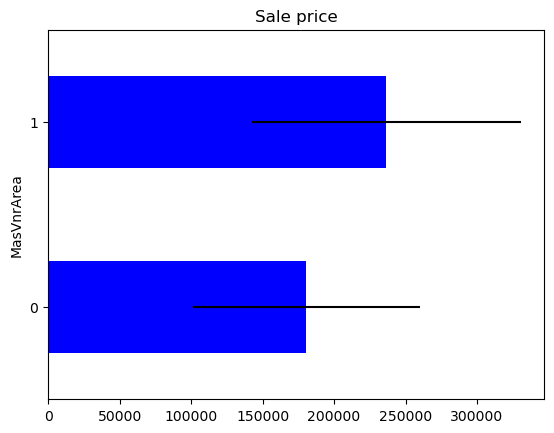

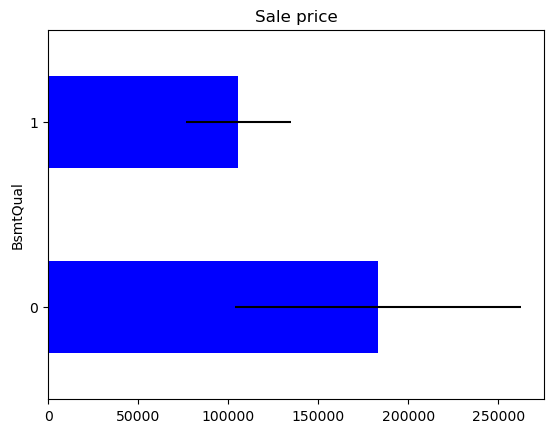

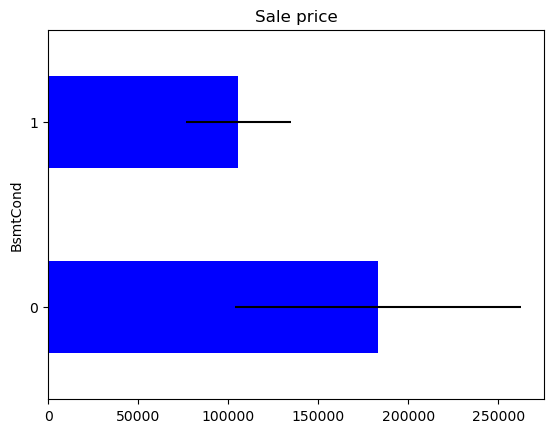

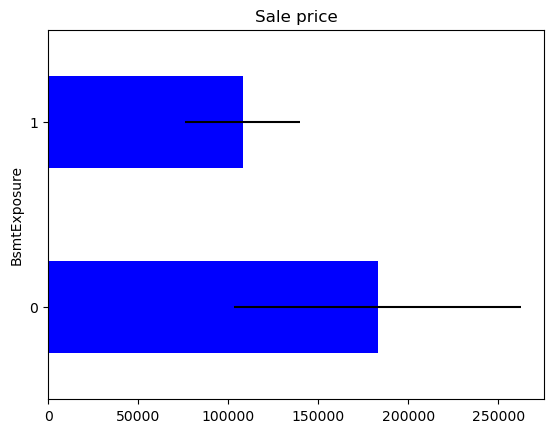

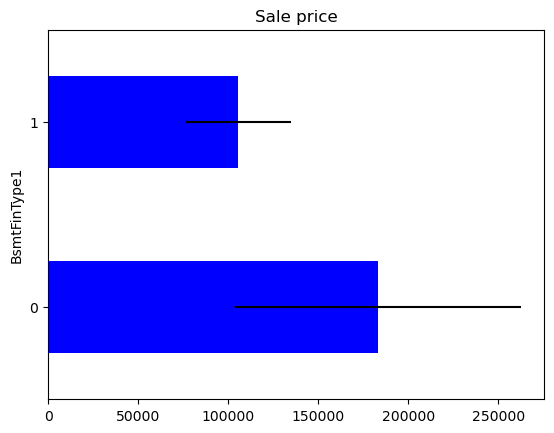

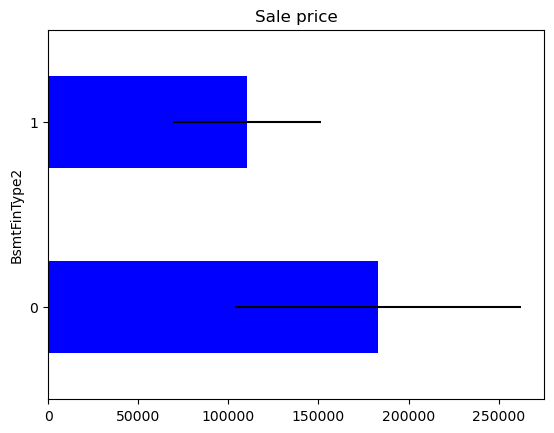

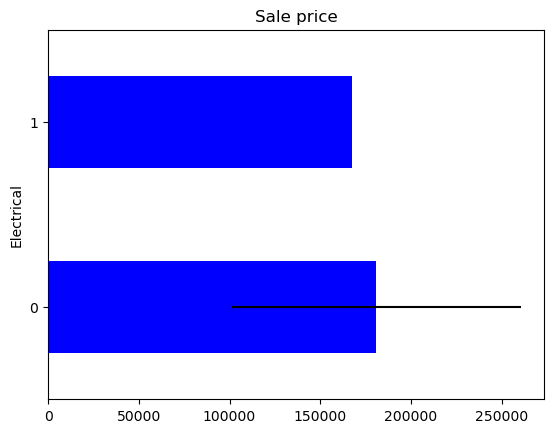

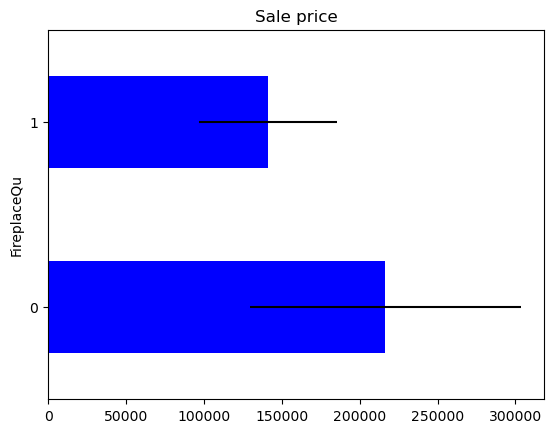

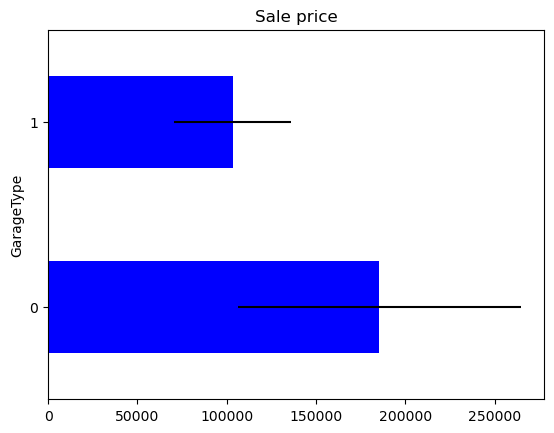

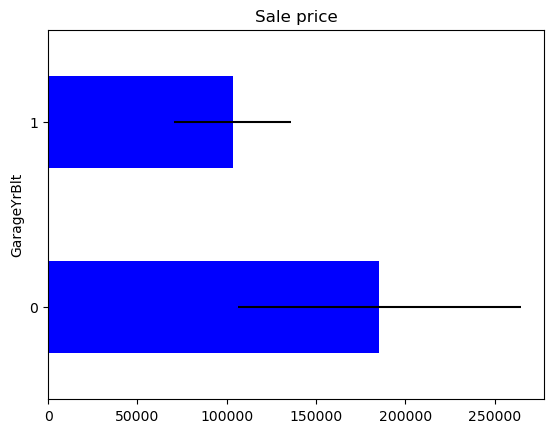

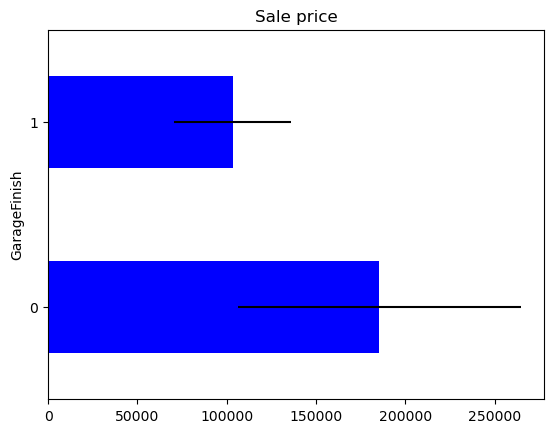

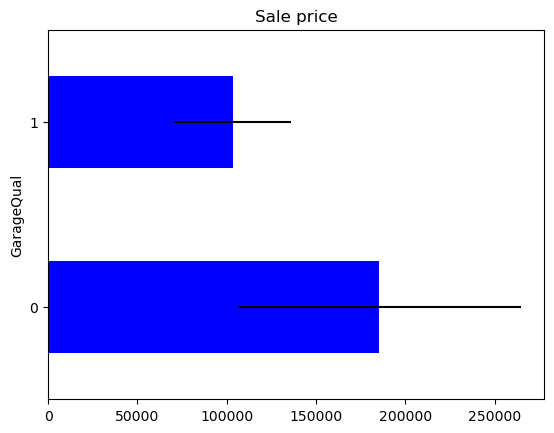

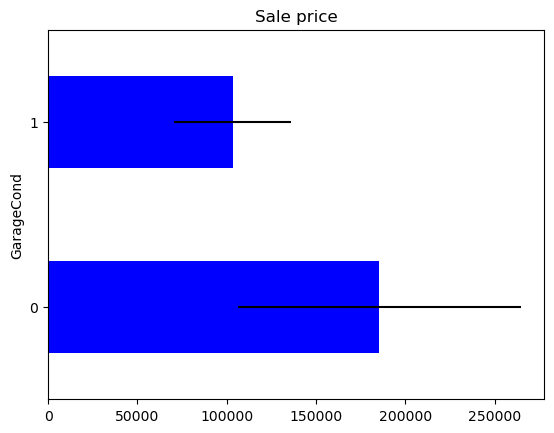

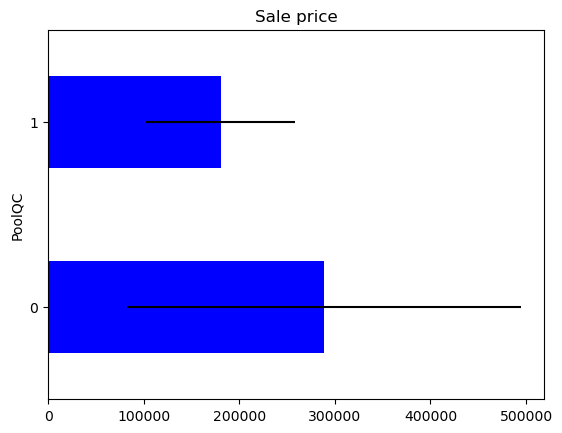

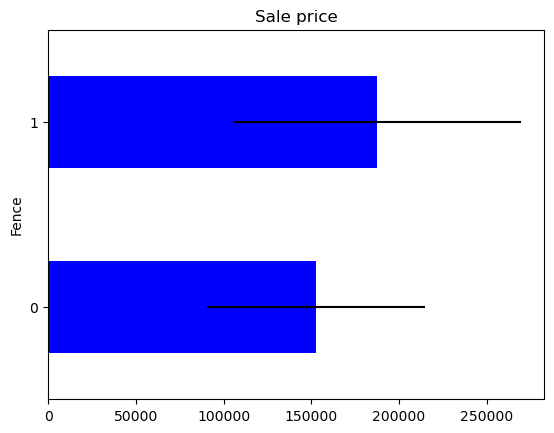

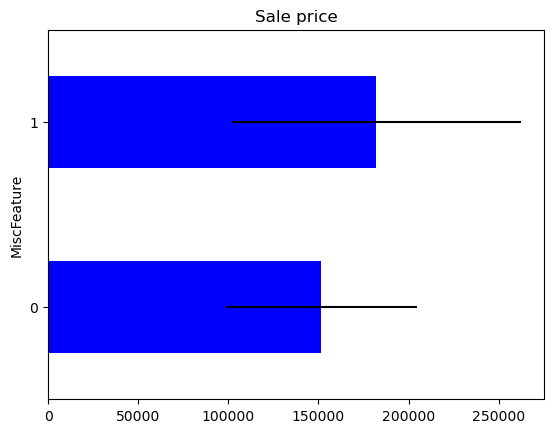

In [20]:
for var in vars_with_na:
    analyse_na_value(data, var)

In some variables, the average Sale Price in houses where the information is missing, differs from the average Sale Price in houses where information exists. This suggests that data being missing could be a good predictor of Sale Price.

In [21]:
print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
data[num_vars].head()

Number of numerical variables:  35


LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5       2003          2003   
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   
3         60.0     9550            7            5       1915          1970   
4         84.0    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0       196.0         706           0        150          856       856   
1         0.0         978           0        284         1262      1262   
2       162.0         486           0        434          920       920   
3         0.0         216           0        540          756       961   
4       350.0         655           0        490         1145      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         1             3             1             8           0   
1         0             3             1             6           1   
2         1             3             1             6           1   
3         0             3             1             7           1   
4         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  
0              0          0            0         0        0       2    2008  
1              0          0            0         0        0       5    2007  
2              0          0            0         0        0       9    2008  
3            272          0            0         0        0       2    2006  
4              0          0            0         0        0      12    2008

## Temporal variables

We have 4 year variables in the dataset:

- YearBuilt: year in which the house was built
- YearRemodAdd: year in which the house was remodeled
- GarageYrBlt: year in which a garage was built
- YrSold: year in which the house was sold



In [27]:
year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]

year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [28]:
for var in year_vars:
    print(var,data[var].unique())
    print()

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 200

Text(0, 0.5, 'Median House Price')

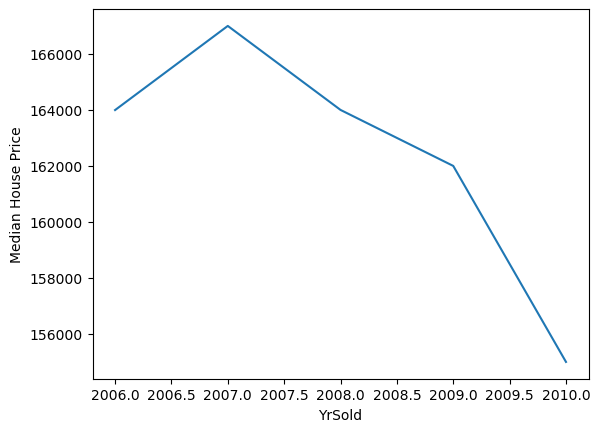

In [30]:
data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

There has been a drop in the value of the houses. That is unusual, in real life, house prices typically go up as years go by.


Text(0, 0.5, 'Median House Price')

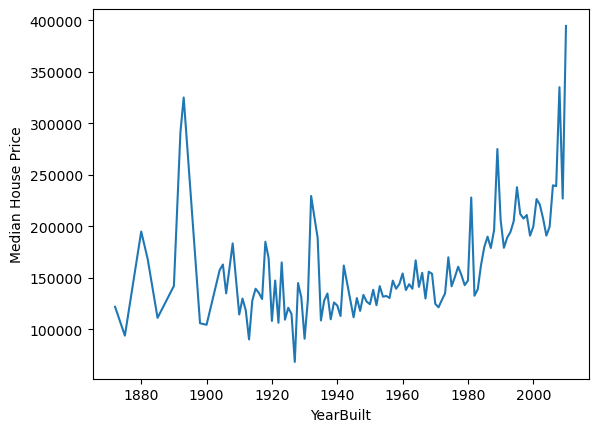

In [31]:
# plot median sale price vs year in which it was built

data.groupby('YearBuilt')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

We can see that newly built / younger houses tend to be more expensive.

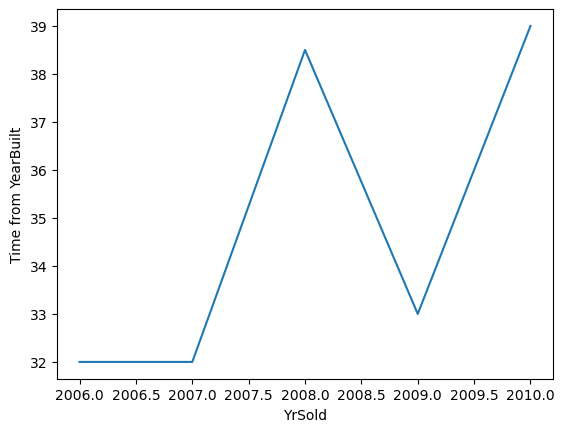

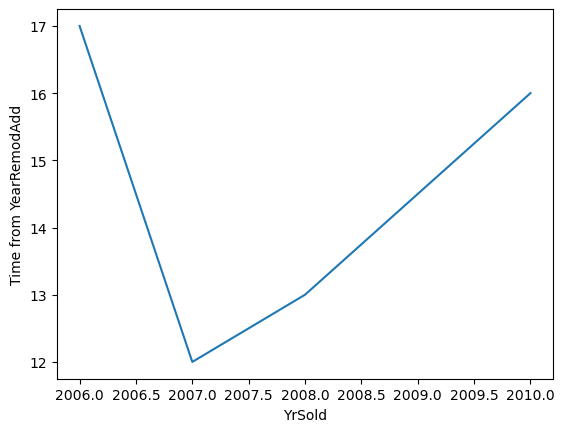

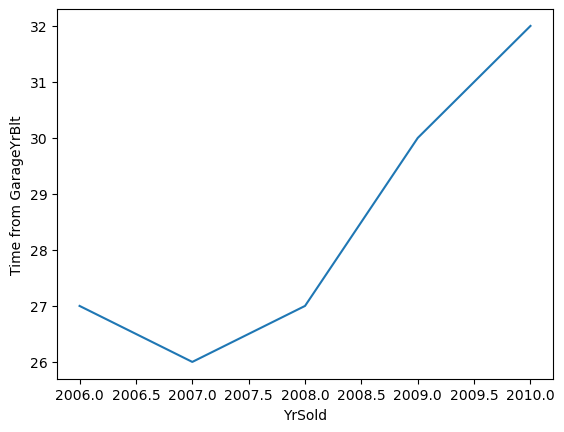

In [37]:
def analyse_year_vars(df, var):
    
    df = df.copy()
    
    # capture difference between a year variable and year
    # in which the house was sold
    df[var] = df['YrSold'] - df[var]
    
    df.groupby('YrSold')[var].median().plot()
    plt.ylabel('Time from ' + var)
    plt.show()
    
    
for var in year_vars:
    if var !='YrSold':
        analyse_year_vars(data, var)

From the plots, we see that towards 2010, the houses sold had older garages, and had not been remodelled recently, that might explain why we see cheaper sales prices in recent years, at least in this dataset.

We can now plot instead the time since last remodelled, or time since built, and sale price, to see if there is a relationship.

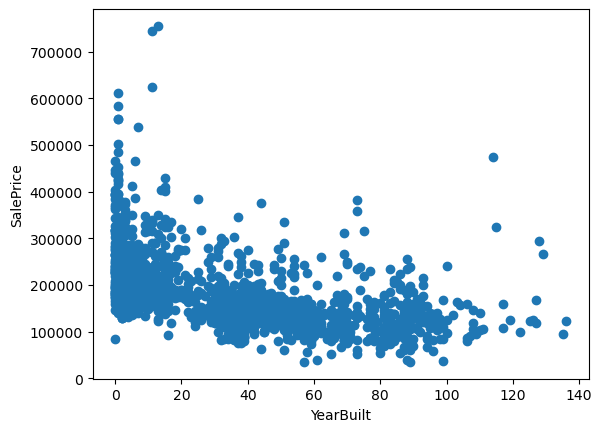

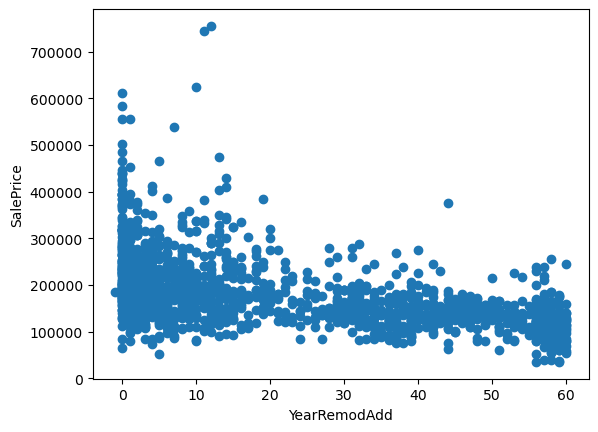

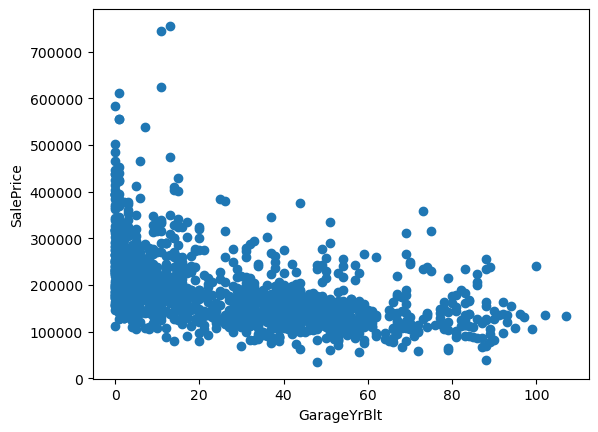

In [38]:
def analyse_year_vars(df, var):
    
    df = df.copy()
    
    # capture difference between a year variable and year
    # in which the house was sold
    df[var] = df['YrSold'] - df[var]
    
    plt.scatter(df[var], df['SalePrice'])
    plt.ylabel('SalePrice')
    plt.xlabel(var)
    plt.show()
    
    
for var in year_vars:
    if var !='YrSold':
        analyse_year_vars(data, var)

We see that there is a tendency to a decrease in price, with older houses. In other words, the longer the time between the house was built or remodeled and sale date, the lower the sale Price. 

Which makes sense, cause this means that the house will have an older look, and potentially needs repairs.

## Discrete variables

In [42]:
discrete_vars=[var for var in num_vars if len(
    data[var].unique())<20 and var not in year_vars]

print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  13


In [43]:
data[discrete_vars].head()

OverallQual  OverallCond  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0            7            5             1             0         2         1   
1            6            8             0             1         2         0   
2            7            5             1             0         2         1   
3            7            5             1             0         1         0   
4            8            5             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  PoolArea  \
0             3             1             8           0           2         0   
1             3             1             6           1           2         0   
2             3             1             6           1           2         0   
3             3             1             7           1           3         0   
4             4             1             9           1           3         0   

   MoSold  
0       2  
1       5  
2       9  
3       2  
4      12

These discrete variables tend to be qualifications (Qual) or grading scales (Cond), or refer to the number of rooms, or units (FullBath, GarageCars), or indicate the area of the room (KitchenAbvGr).

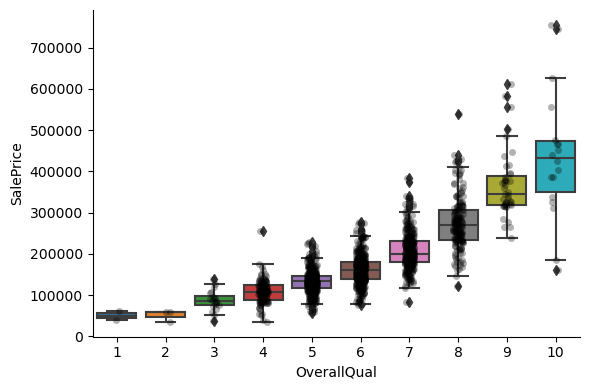

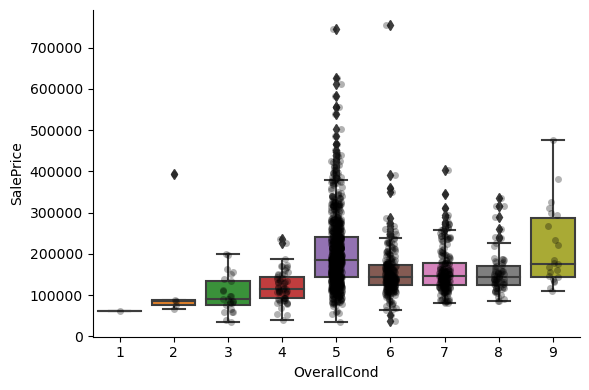

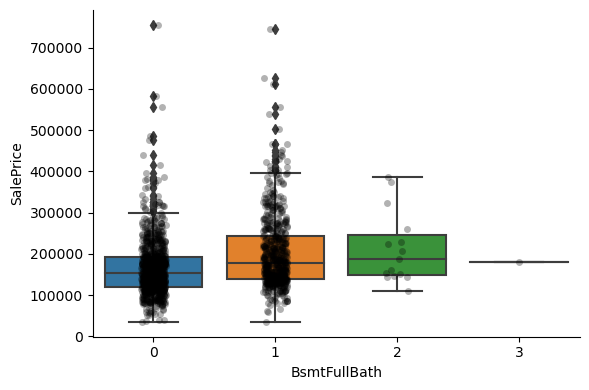

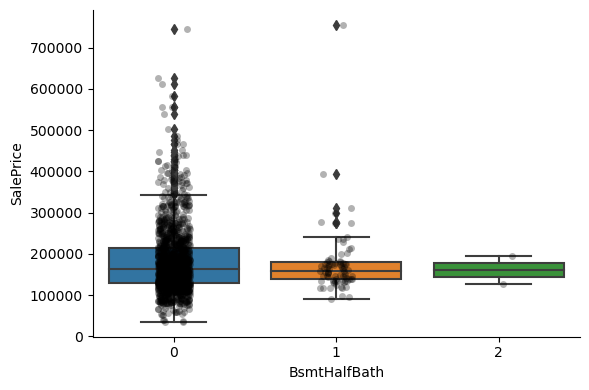

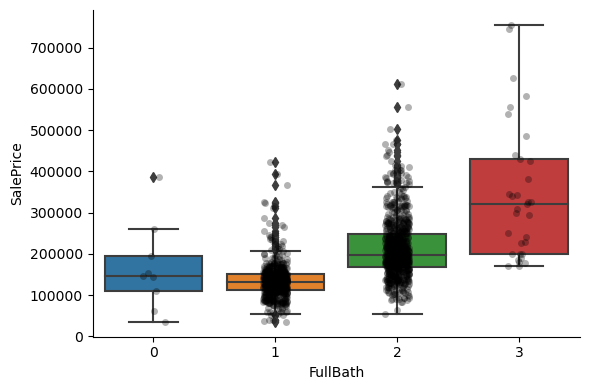

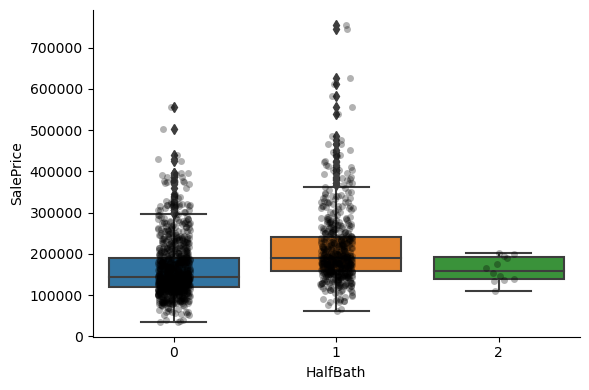

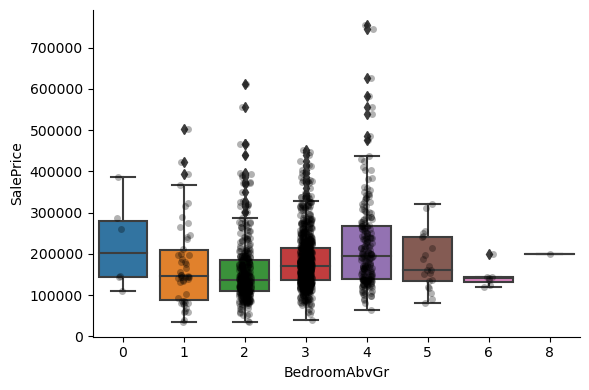

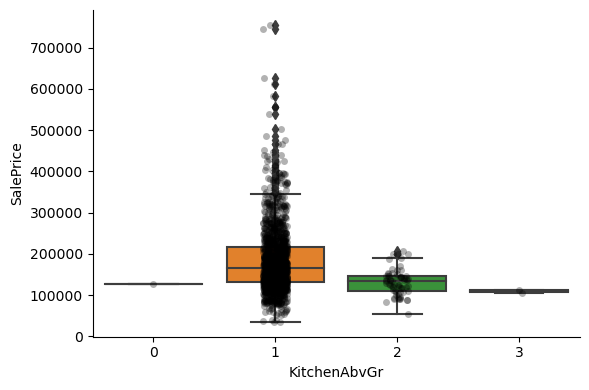

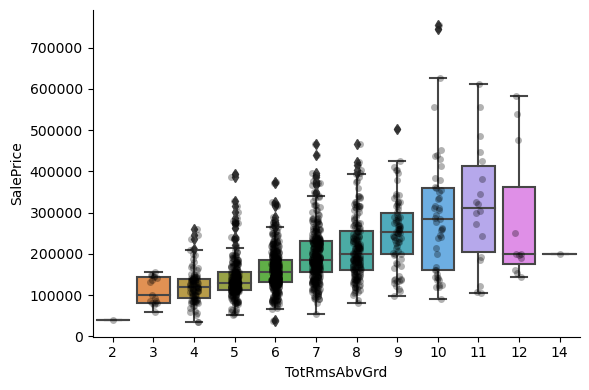

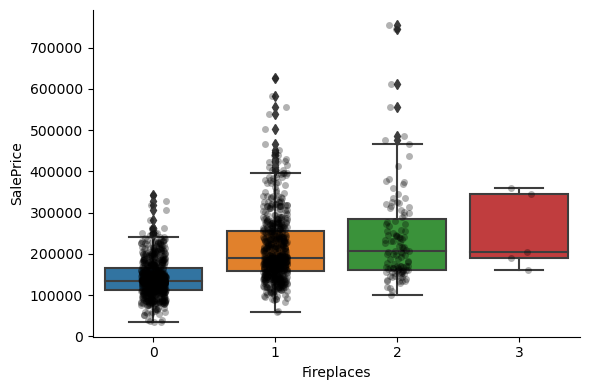

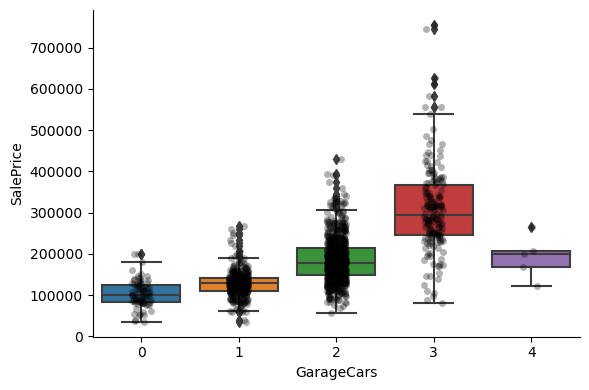

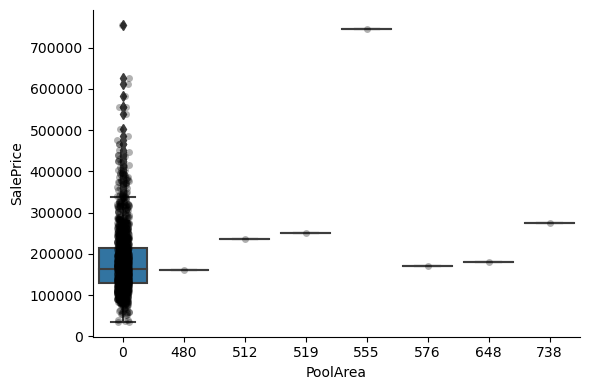

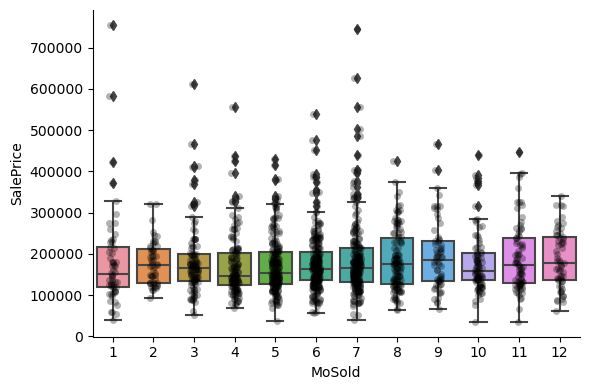

In [47]:
for var in discrete_vars:
    sns.catplot(x=var,y='SalePrice',data=data,kind='box',height=4,aspect=1.5)
    sns.stripplot(x=var,y='SalePrice',data=data,jitter=0.1, alpha=0.3, color='k')
    plt.show()

For most discrete numerical variables, we see an increase in the sale price, with the quality, or overall condition, or  number of rooms, or surface.

## Continuous variables

In [48]:
cont_vars=[var for var in num_vars if var not in discrete_vars+year_vars]
print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  18


In [49]:
data[cont_vars].head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
0          856       856       854             0       1710         548   
1         1262      1262         0             0       1262         460   
2          920       920       866             0       1786         608   
3          756       961       756             0       1717         642   
4         1145      1145      1053             0       2198         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  
0           0           61              0          0            0        0  
1         298            0              0          0            0        0  
2           0           42              0          0            0        0  
3           0           35            272          0            0        0  
4         192           84              0          0            0        0

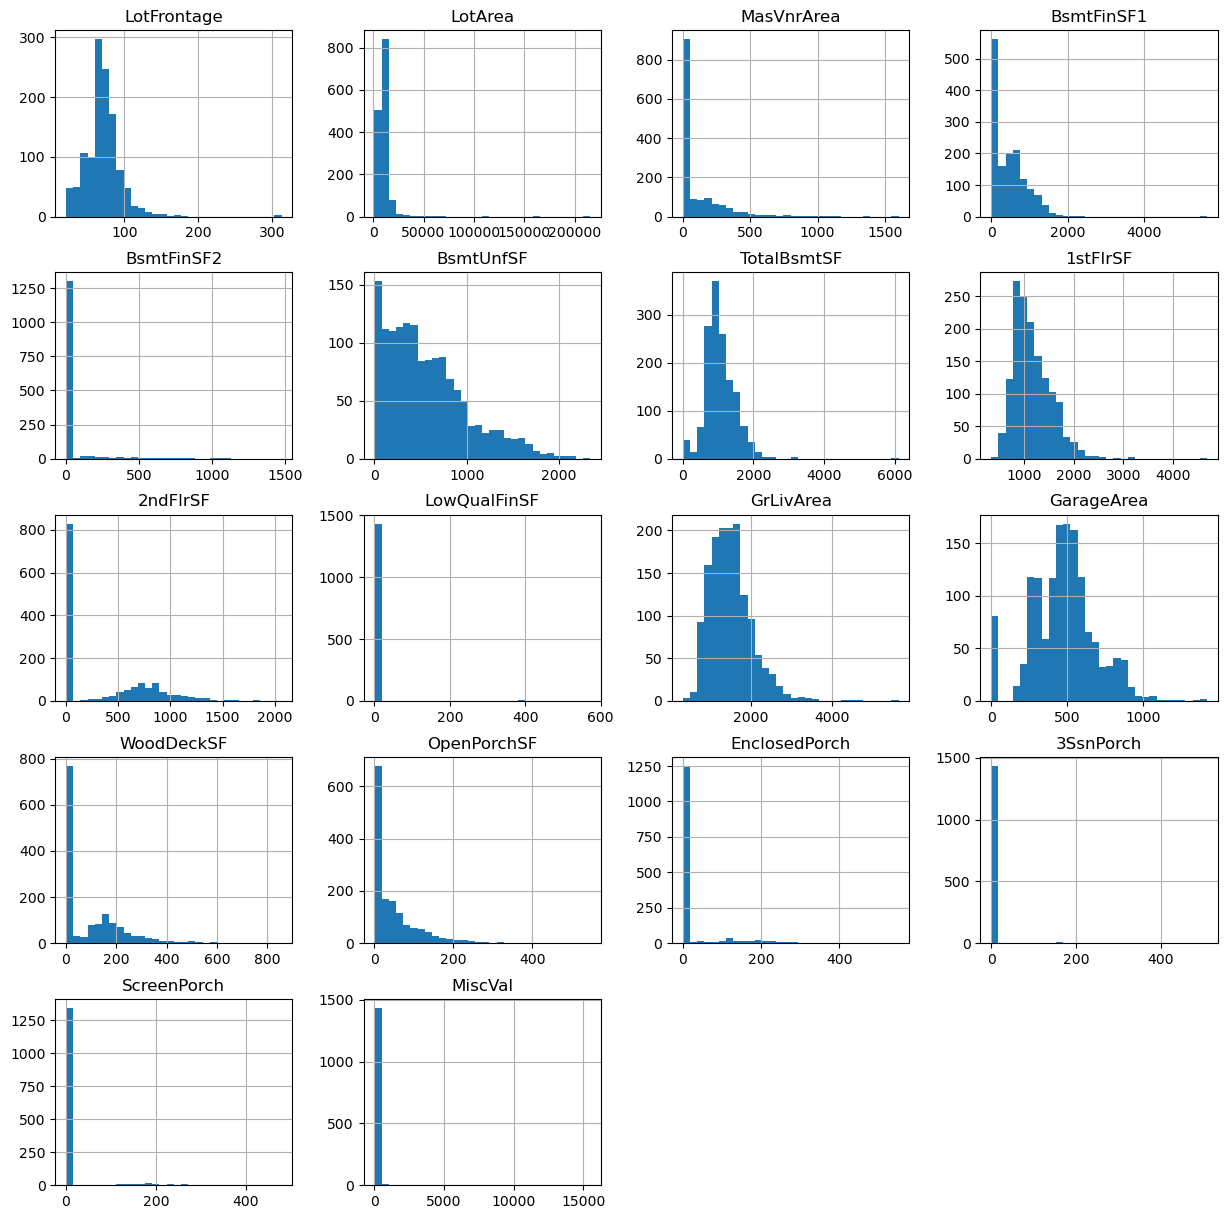

In [50]:
data[cont_vars].hist(bins=30,figsize=(15,15))
plt.show()

The variables are not normally distributed. And there are a particular few that are extremely skewed like 3SsnPorch, ScreenPorch and MiscVal.

Sometimes, transforming the variables to improve the value spread, improves the model performance. But it is unlikely that a transformation will help change the distribution of the super skewed variables dramatically.

We can apply a Yeo-Johnson transformation to variables like LotFrontage, LotArea, BsmUnfSF, and a binary transformation to variables like 3SsnPorch, ScreenPorch and MiscVal.

In [51]:
skewed = [
    'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'MiscVal'
]

In [52]:
cont_vars = [
    'LotFrontage',
    'LotArea',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'GrLivArea',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
]

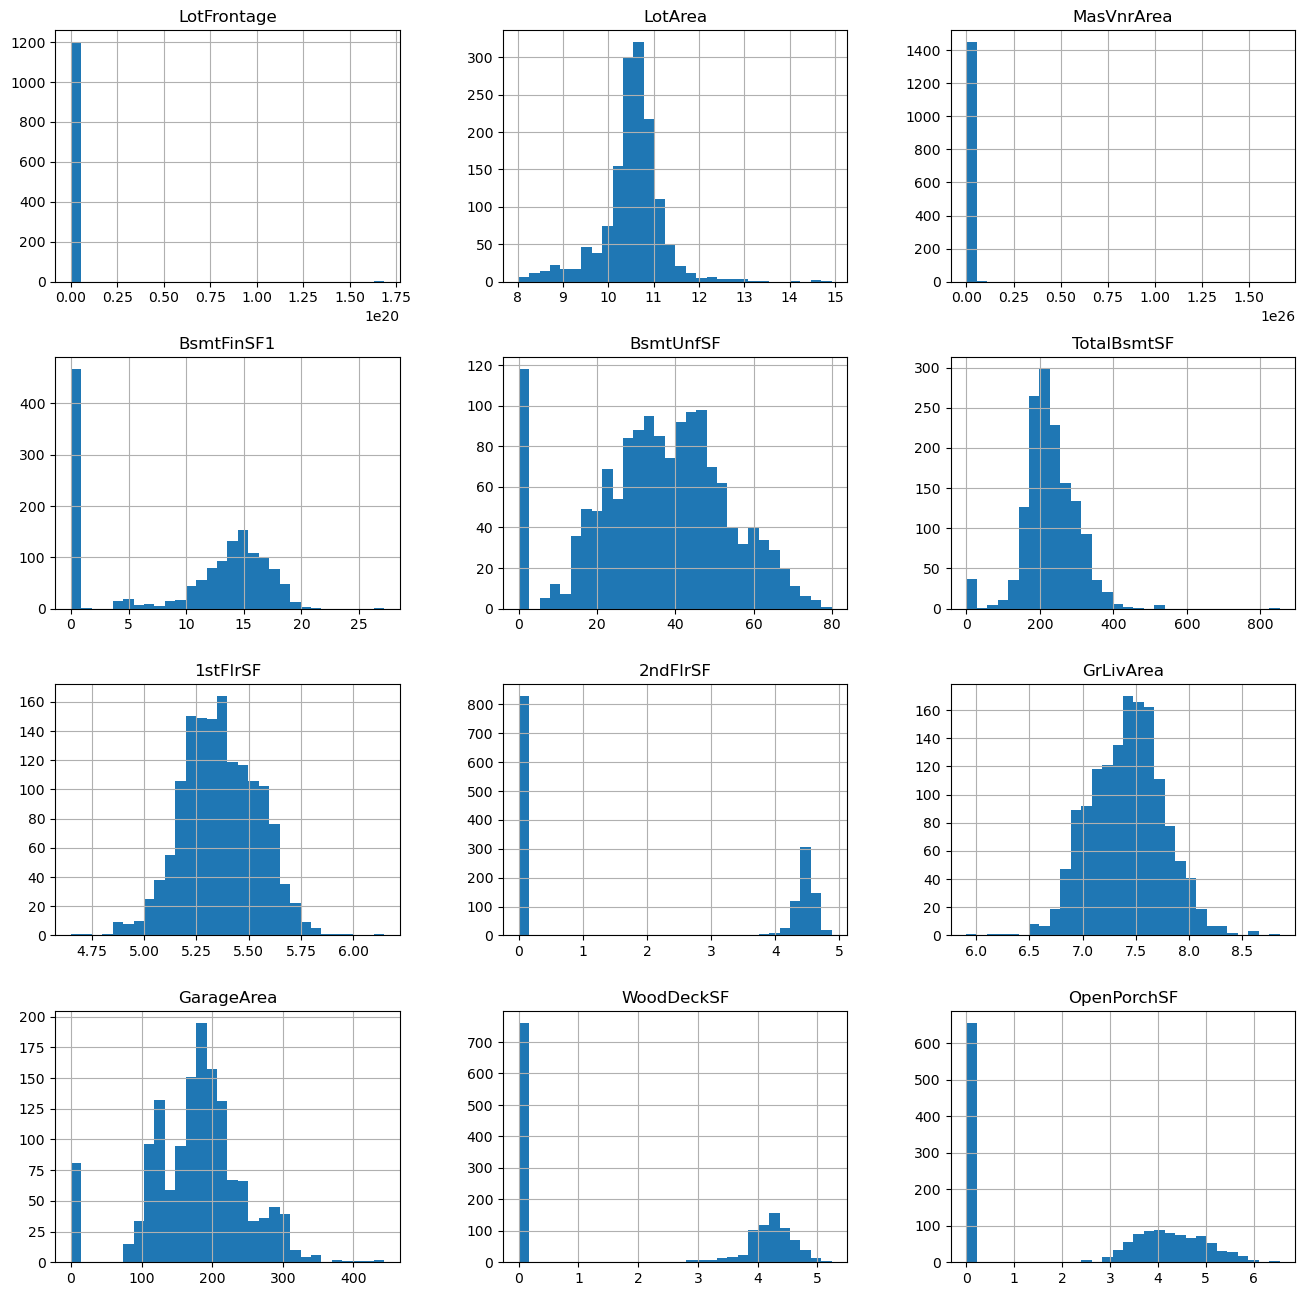

In [56]:
tmp =data.copy()
for var in cont_vars:
    tmp[var],param=stats.yeojohnson(data[var])
tmp[cont_vars].hist(bins=30,figsize=(16,16))
plt.show()

For LotFrontage and MasVnrArea the transformation did not do an amazing job. 

For the others, the values seem to be spread more evenly in the range.

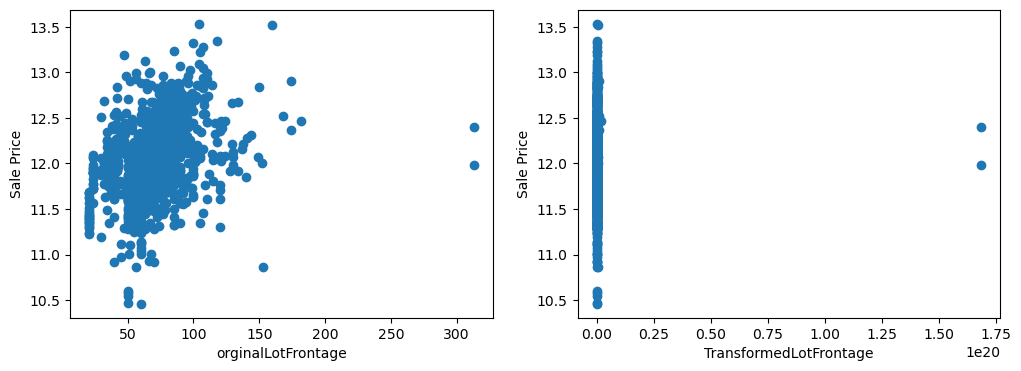

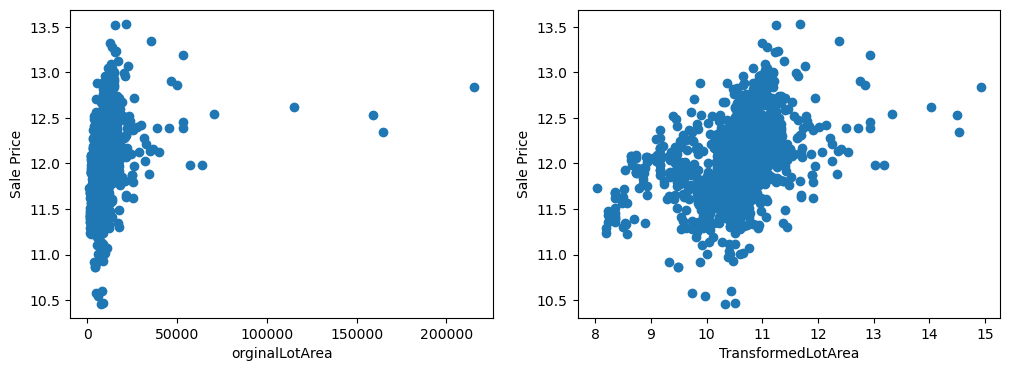

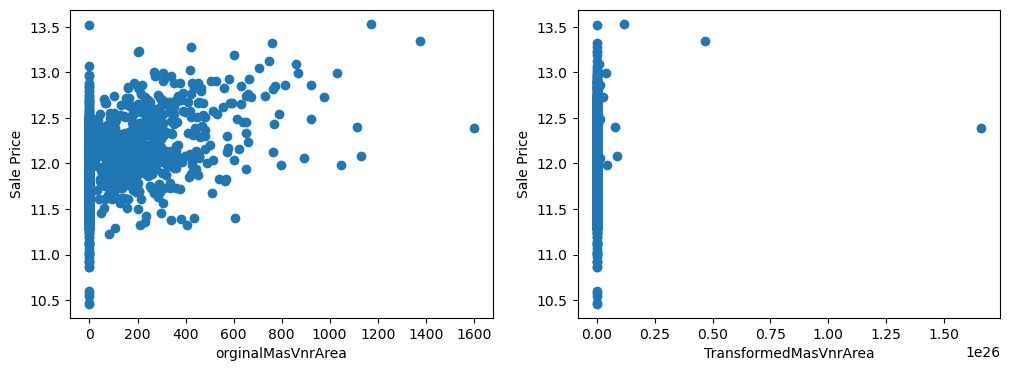

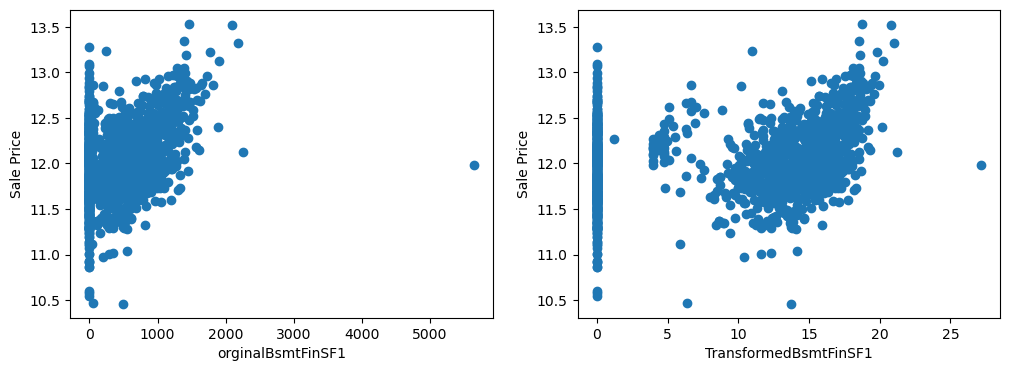

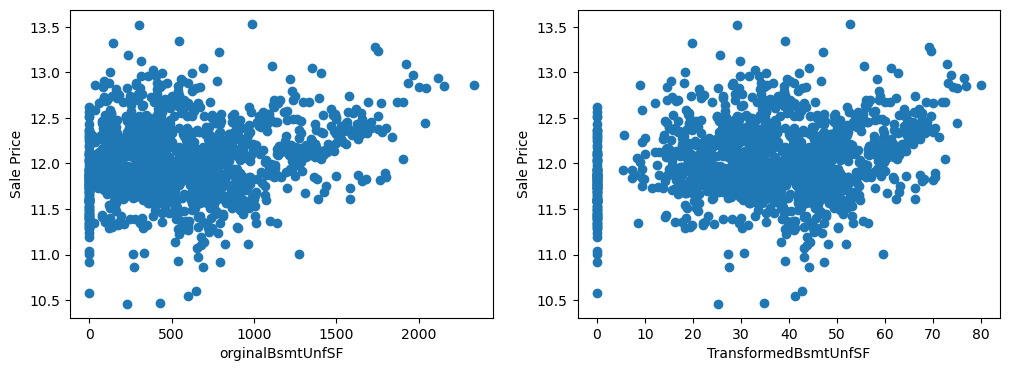

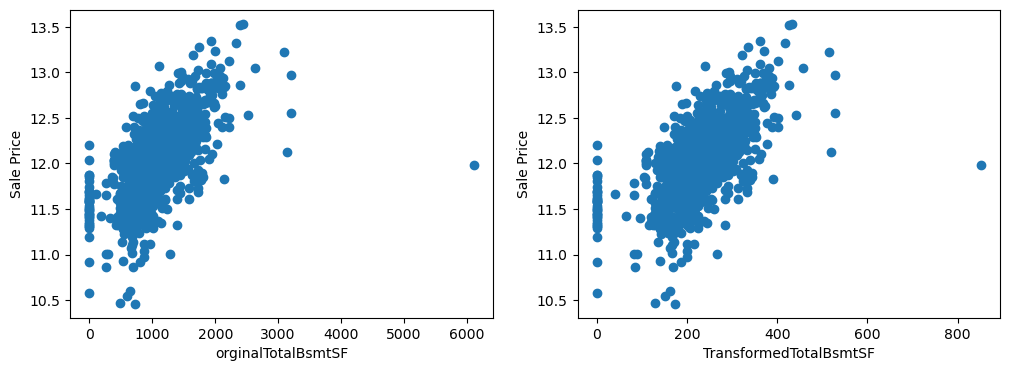

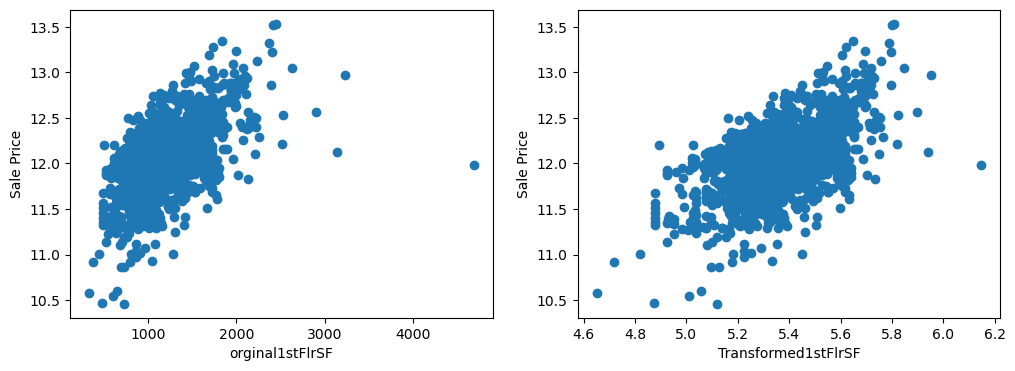

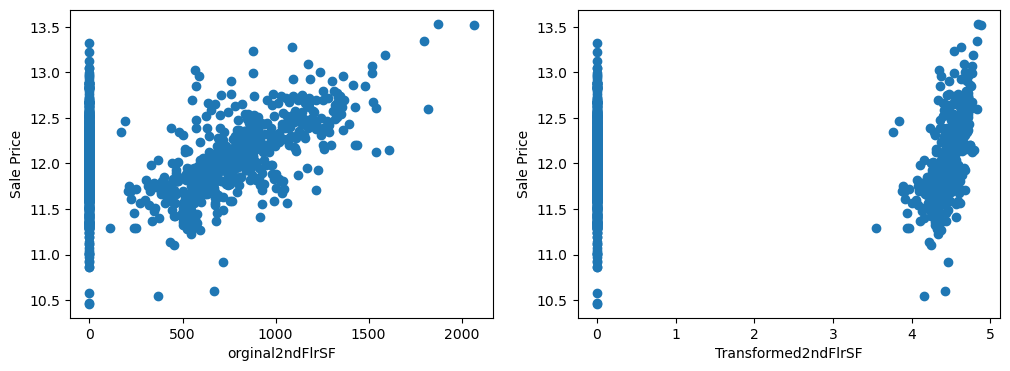

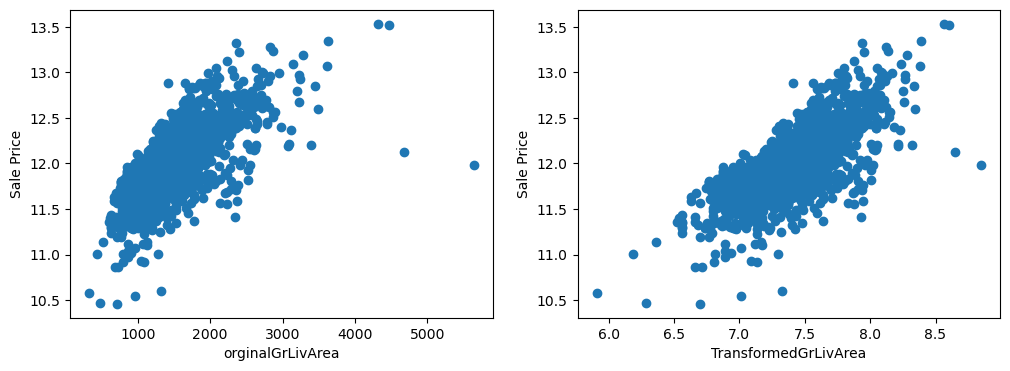

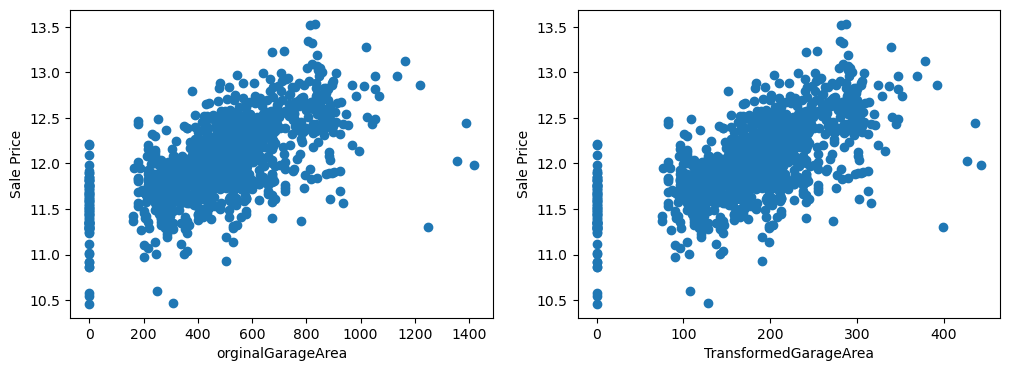

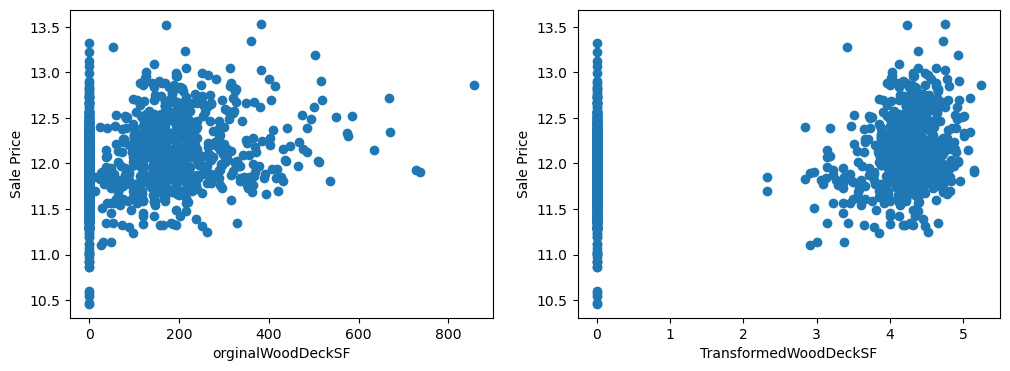

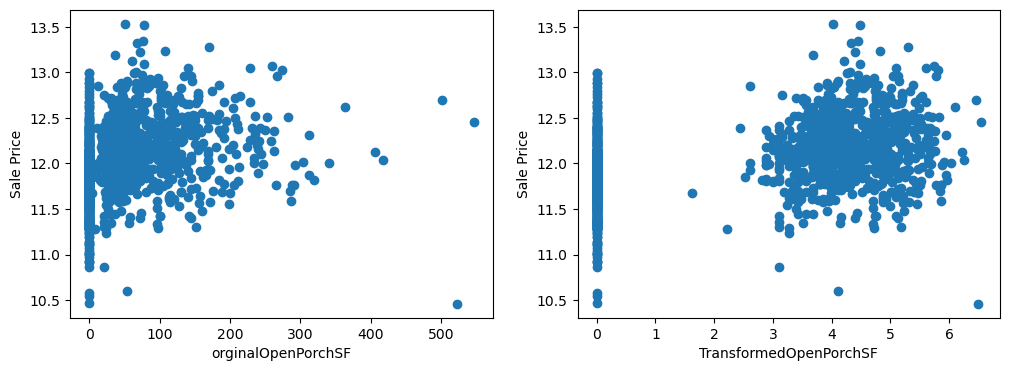

In [57]:
for var in cont_vars:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.scatter(data[var],np.log(tmp['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('orginal' + var)
    
    plt.subplot(1,2,2)
    plt.scatter(tmp[var],np.log(tmp['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Transformed' + var)
    plt.show()

the transformations seems to improve the relationship only for LotArea.

 Most variables contain the value 0, and thus we can't apply the logarithmic transformation, but we can certainly do that for the following variables:

 ["LotFrontage", "1stFlrSF", "GrLivArea"]

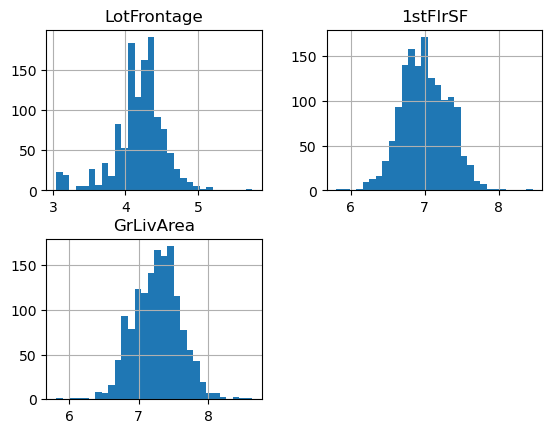

In [58]:
tmp = data.copy()

for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:

    # transform the variable with logarithm
    tmp[var] = np.log(data[var])
    
tmp[["LotFrontage", "1stFlrSF", "GrLivArea"]].hist(bins=30)
plt.show()

The distribution of the variables are now more "Gaussian" looking.

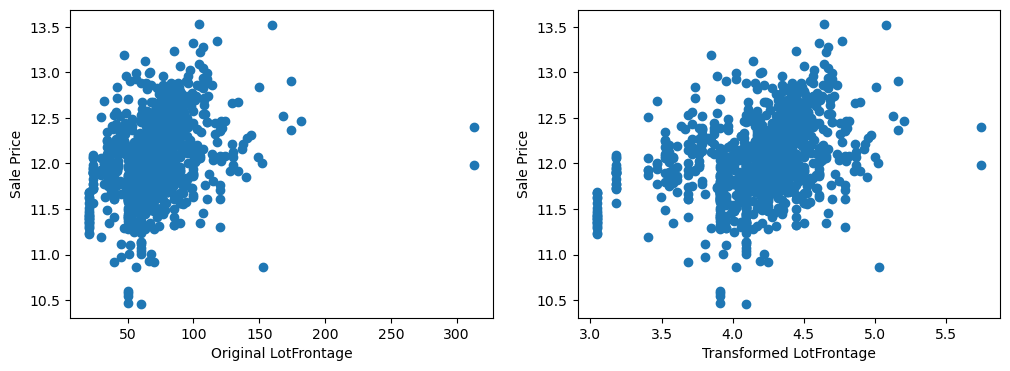

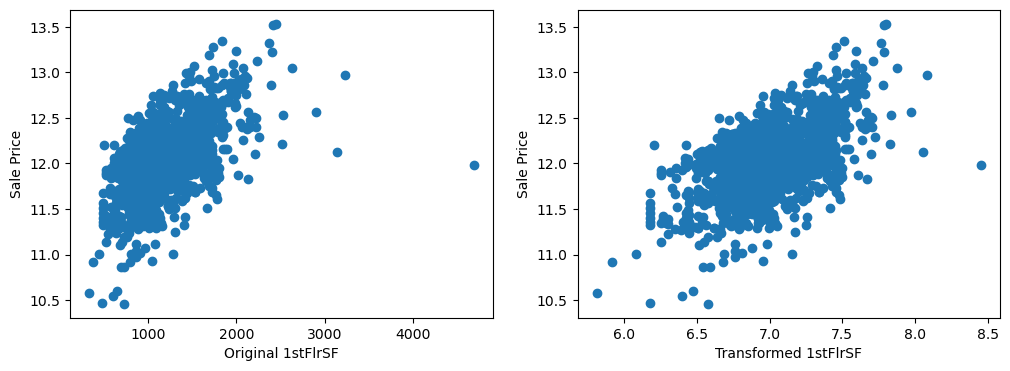

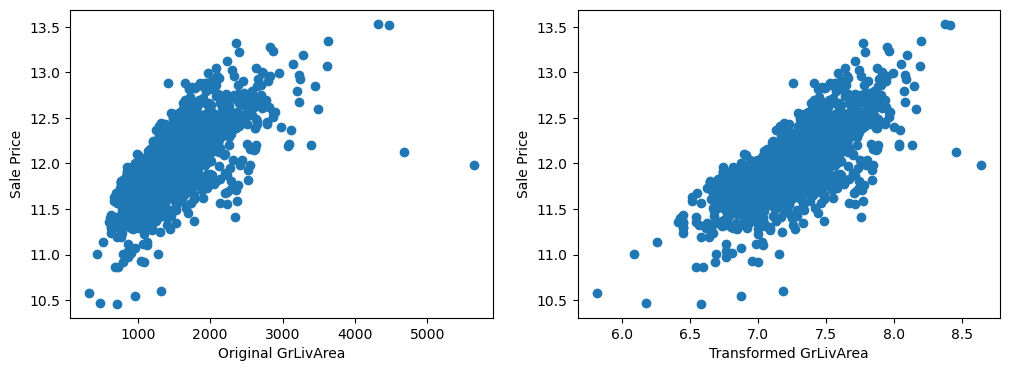

In [59]:
for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:
    
    plt.figure(figsize=(12,4))
    
    # plot the original variable vs sale price    
    plt.subplot(1, 2, 1)
    plt.scatter(data[var], np.log(data['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Original ' + var)

    # plot transformed variable vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Transformed ' + var)
                
    plt.show()

The transformed variables have a better spread of the values, which may in turn, help make better predictions.

In [63]:
data[skewed].describe()

BsmtFinSF2  LowQualFinSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000   1460.000000    1460.000000  1460.000000  1460.000000   
mean     46.549315      5.844521      21.954110     3.409589    15.060959   
std     161.319273     48.623081      61.119149    29.317331    55.757415   
min       0.000000      0.000000       0.000000     0.000000     0.000000   
25%       0.000000      0.000000       0.000000     0.000000     0.000000   
50%       0.000000      0.000000       0.000000     0.000000     0.000000   
75%       0.000000      0.000000       0.000000     0.000000     0.000000   
max    1474.000000    572.000000     552.000000   508.000000   480.000000   

            MiscVal  
count   1460.000000  
mean      43.489041  
std      496.123024  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max    15500.000000

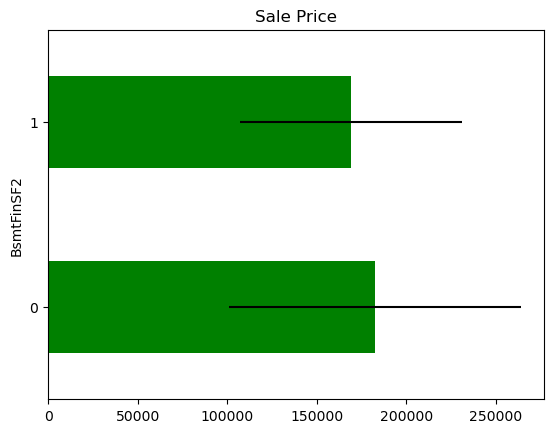

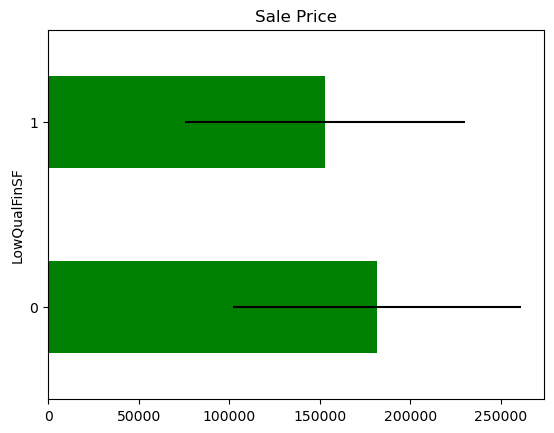

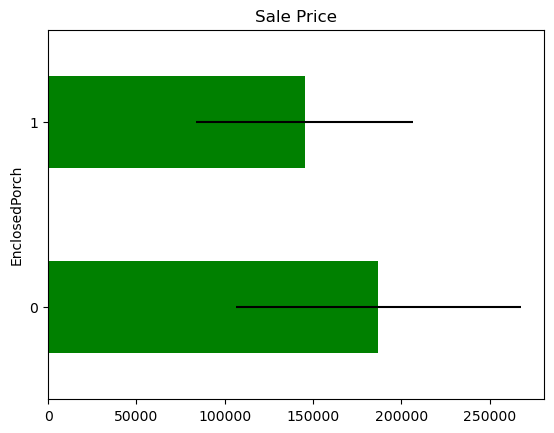

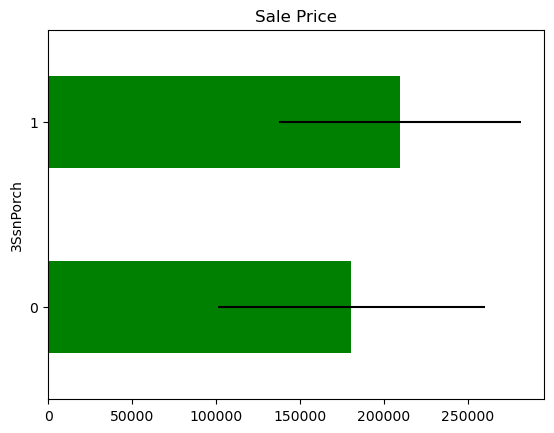

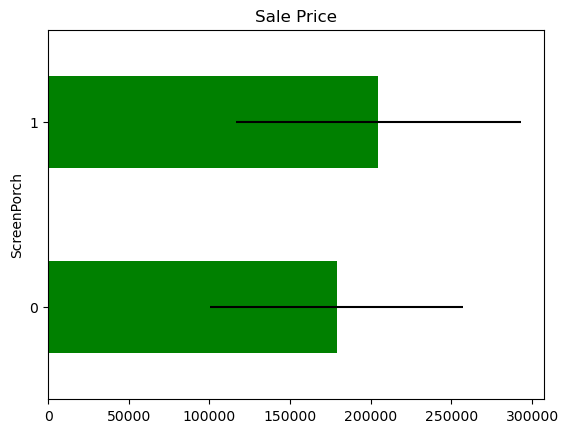

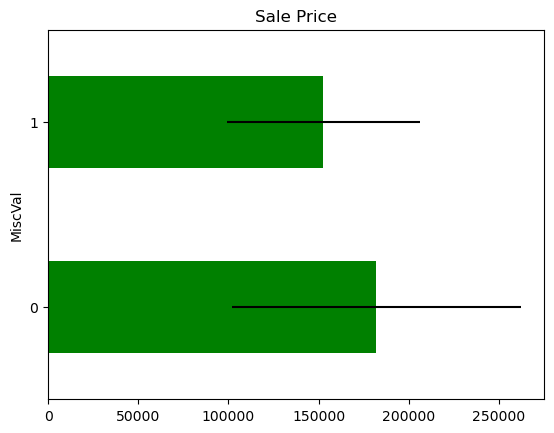

In [64]:
for var in skewed:
    
    tmp = data.copy()
    
    # map the variable values into 0 and 1
    tmp[var] = np.where(data[var]==0, 0, 1)
    
    # determine mean sale price in the mapped values
    tmp = tmp.groupby(var)['SalePrice'].agg(['mean', 'std'])

    # plot into a bar graph
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Sale Price", color='green')

    plt.show()

# Categorical variables

In [65]:
print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  44


In [66]:
data[cat_vars].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd        NaN        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng        NaN        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition MSSubClass  
0       WD        Normal         60  
1       WD        Normal         20  
2       WD        Normal         60  
3       WD       Abnorml         70  
4       WD        Normal         60

## Number of labels: cardinality

how many different categories are present in each of the variables.

<Axes: >

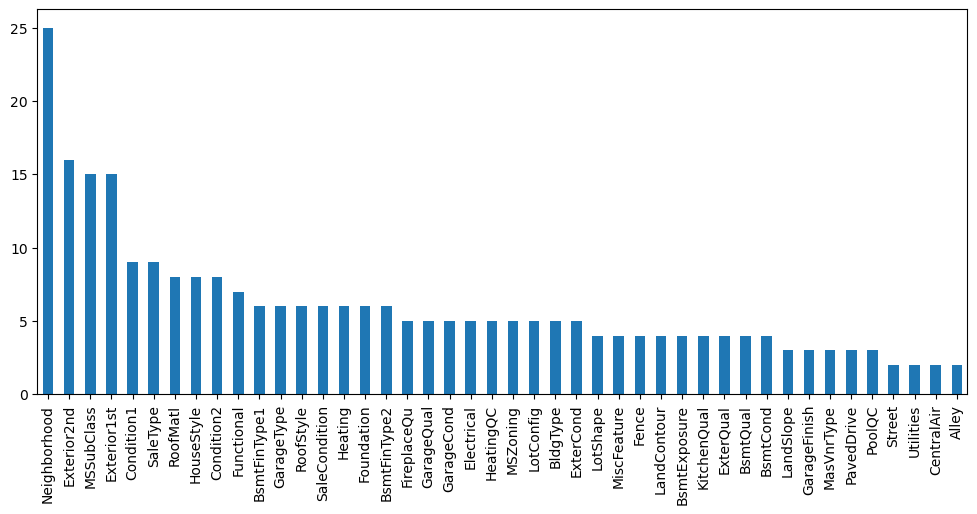

In [67]:
data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

## Quality variables

There are a number of variables that refer to the quality of some aspect of the house, for example the garage, or the fence, or the kitchen. I will replace these categories by numbers increasing with the quality of the place or room.

The mappings can be obtained from the Kaggle Website. One example:

- Ex = Excellent
- Gd = Good
- TA = Average/Typical
- Fa =	Fair
- Po = Poor

In [68]:
qual_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
             'HeatingQC', 'KitchenQual', 'FireplaceQu',
             'GarageQual', 'GarageCond',
            ]
for vars in qual_vars:
    data[var]=data[vars].map(qual_mappings)

In [69]:
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4, 'Missing': 0, 'NA': 0}

var = 'BsmtExposure'

data[var] = data[var].map(exposure_mappings)

In [70]:
finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_vars = ['BsmtFinType1', 'BsmtFinType2']

for var in finish_vars:
    data[var] = data[var].map(finish_mappings)

In [71]:
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'GarageFinish'

data[var] = data[var].map(garage_mappings)

In [72]:
qual_vars  = qual_vars + finish_vars + ['BsmtExposure','GarageFinish','Fence']

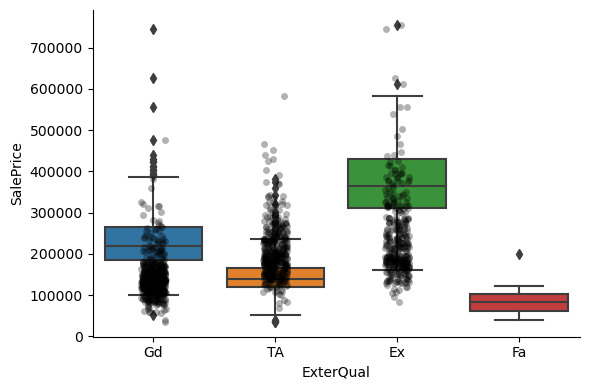

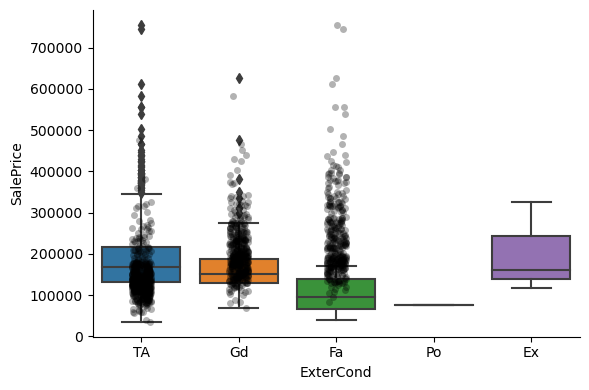

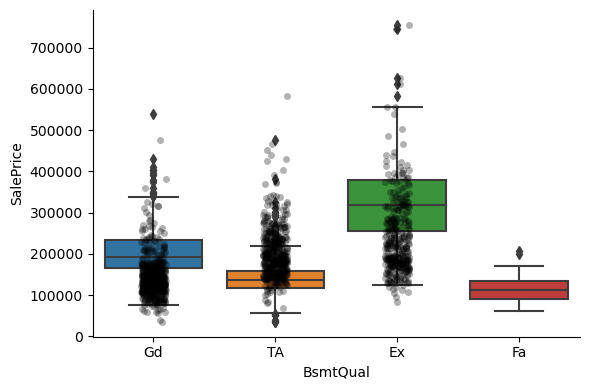

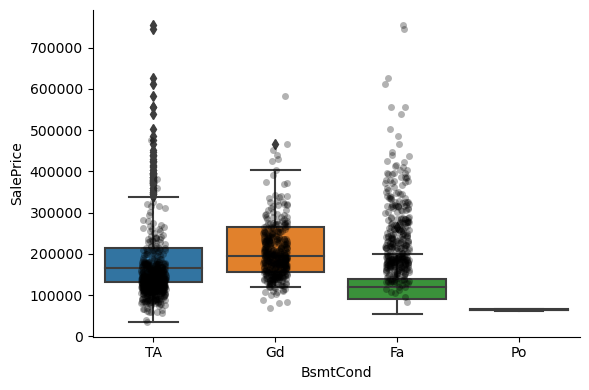

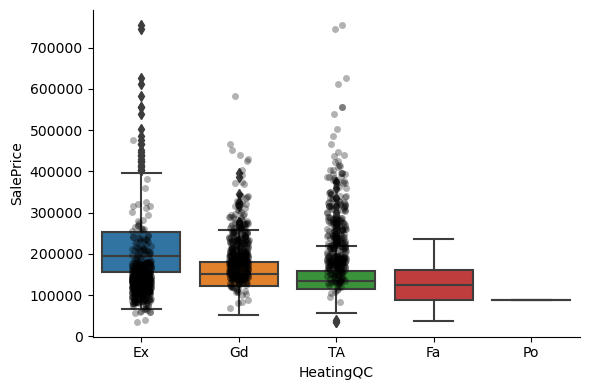

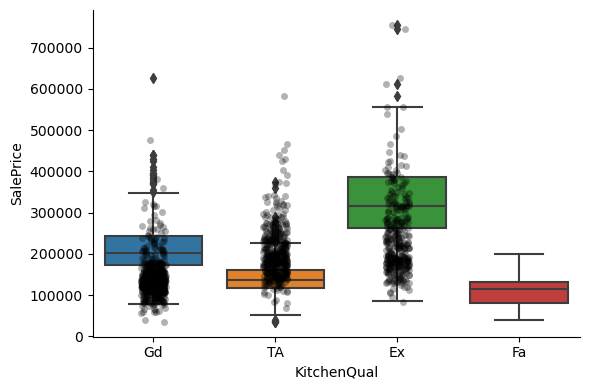

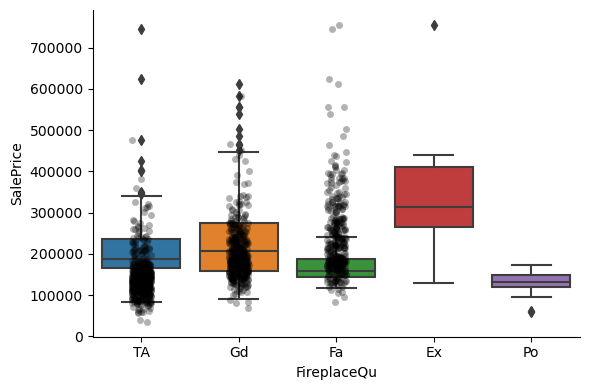

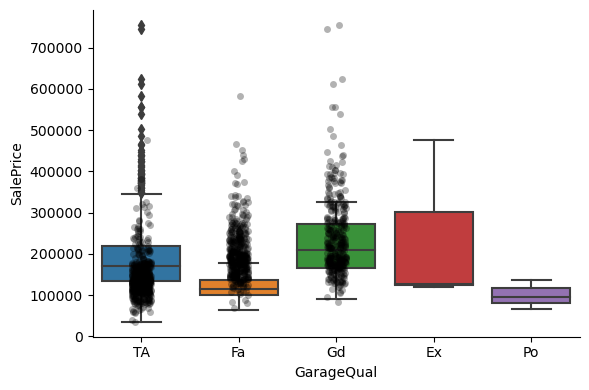

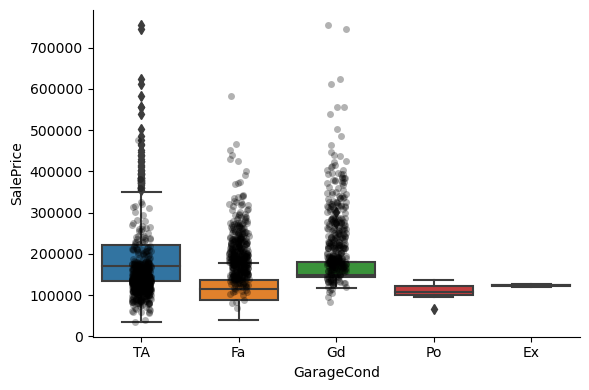

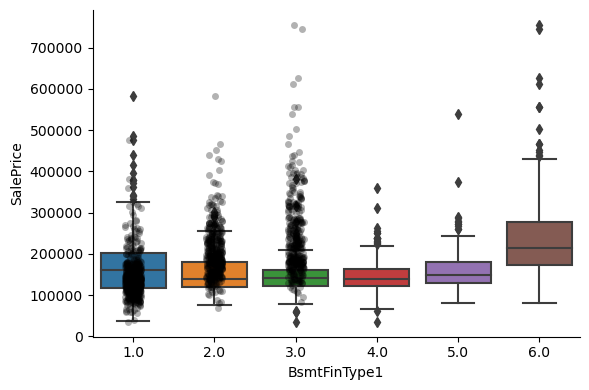

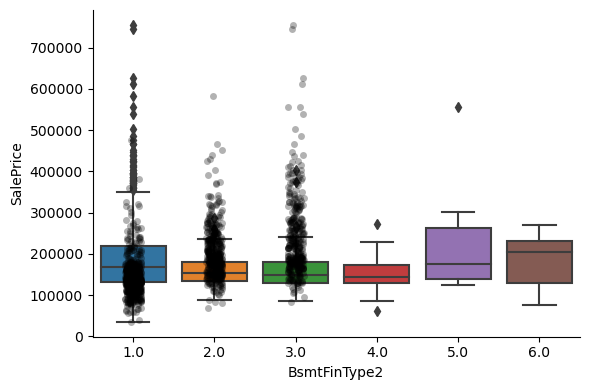

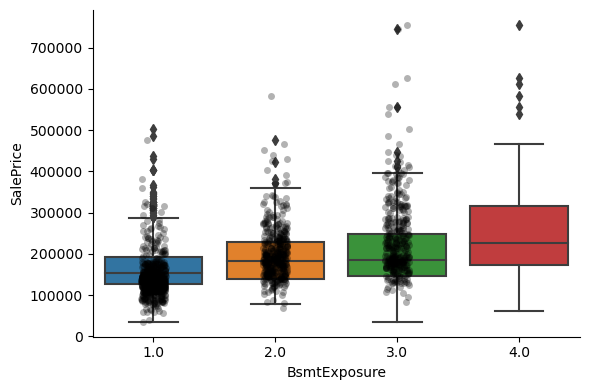

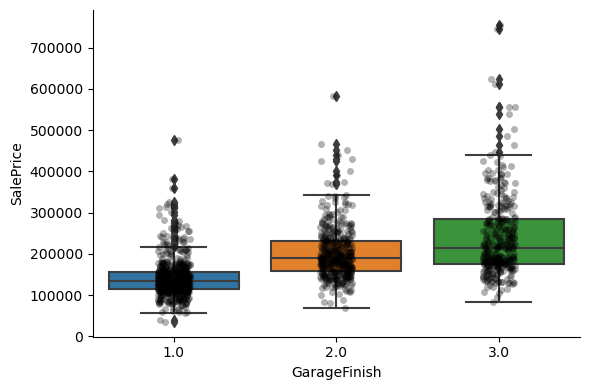

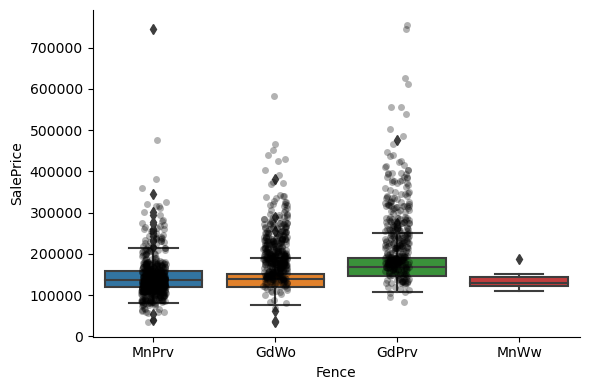

In [73]:
for vars in qual_vars:
    sns.catplot(x=vars ,y='SalePrice',kind="box",data=data,height=4,aspect=1.5)
    sns.stripplot(x=var,y='SalePrice',data=data,jitter=0.1,alpha=0.3,color='k')
    plt.show()

In [74]:
cat_others = [
    var for var in cat_vars if var not in qual_vars
]

len(cat_others)

30

In [76]:
data[cat_others].nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        3
Foundation        6
Heating           6
CentralAir        2
Electrical        5
Functional        7
GarageType        6
PavedDrive        3
PoolQC            3
MiscFeature       4
SaleType          9
SaleCondition     6
MSSubClass       15
dtype: int64

In [79]:
data.groupby('MSZoning')['SalePrice'].count()

MSZoning
C (all)      10
FV           65
RH           16
RL         1151
RM          218
Name: SalePrice, dtype: int64

In [80]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)['SalePrice'].count() / len(df)

    # return categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than
# 1 % of the observations

for var in cat_others:
    print(analyse_rare_labels(data, var, 0.01))
    print()

MSZoning
C (all)    0.006849
Name: SalePrice, dtype: float64

Street
Grvl    0.00411
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

LotShape
IR3    0.006849
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64

LotConfig
FR3    0.00274
Name: SalePrice, dtype: float64

LandSlope
Sev    0.008904
Name: SalePrice, dtype: float64

Neighborhood
Blueste    0.001370
NPkVill    0.006164
Veenker    0.007534
Name: SalePrice, dtype: float64

Condition1
PosA    0.005479
RRAe    0.007534
RRNe    0.001370
RRNn    0.003425
Name: SalePrice, dtype: float64

Condition2
Artery    0.001370
Feedr     0.004110
PosA      0.000685
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
RRNn      0.001370
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

HouseStyle
1.5Unf    0.009589
2.5Fin    0.005479
2.5Unf    0.007534
Name: SalePrice, dtype: float64

RoofStyle
Flat

Some of the categorical variables show multiple labels that are present in less than 1% of the houses. 

Labels that are under-represented in the dataset tend to cause over-fitting of machine learning models. 

That is why we want to remove them.

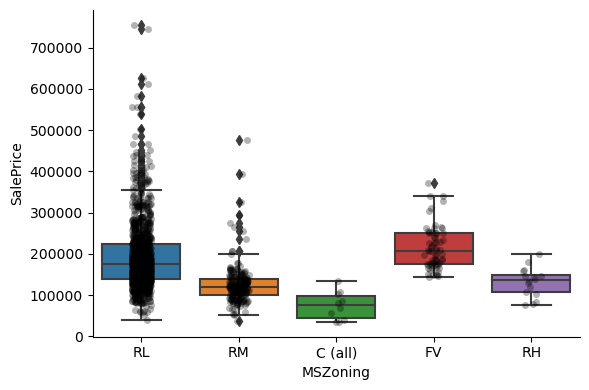

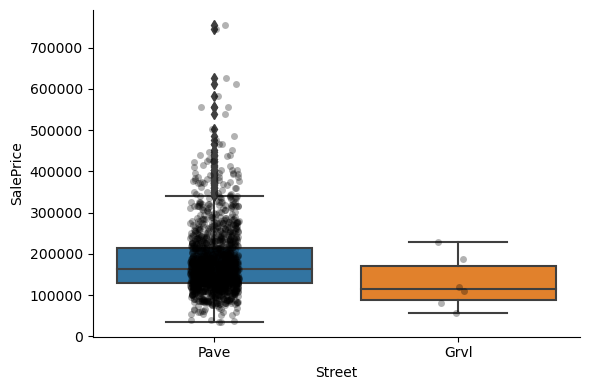

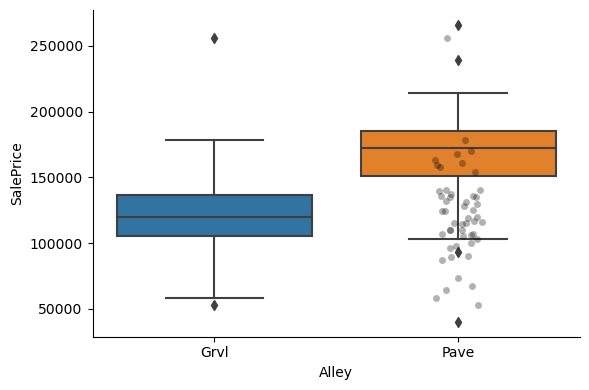

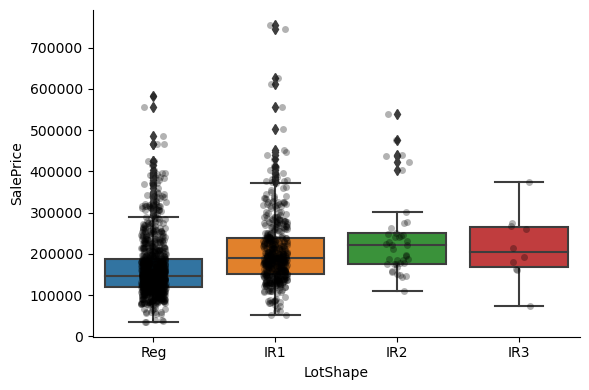

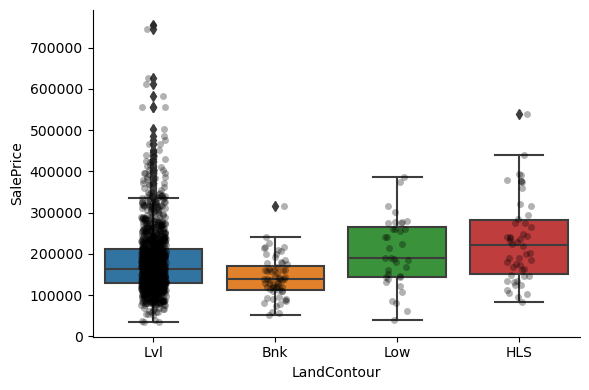

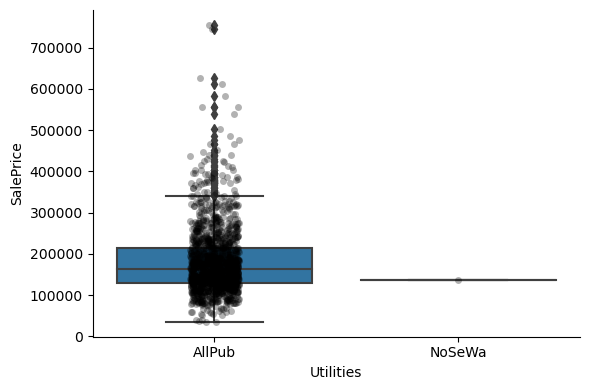

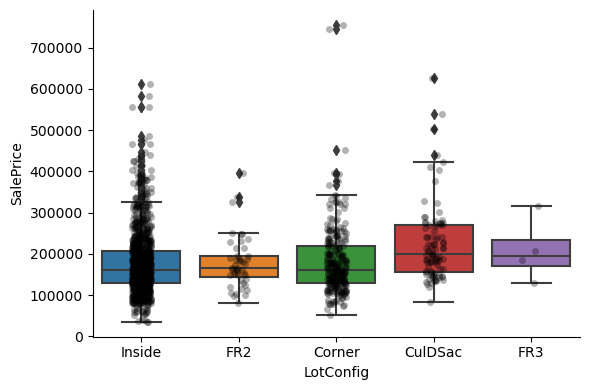

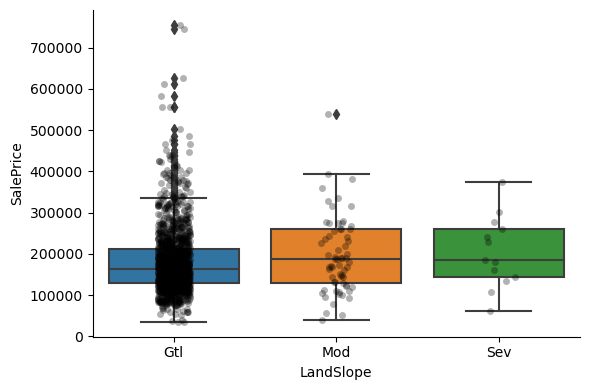

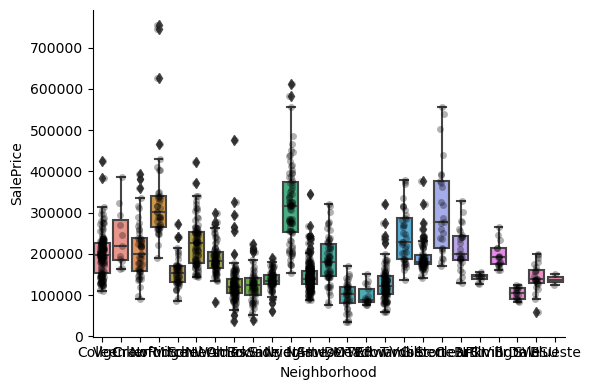

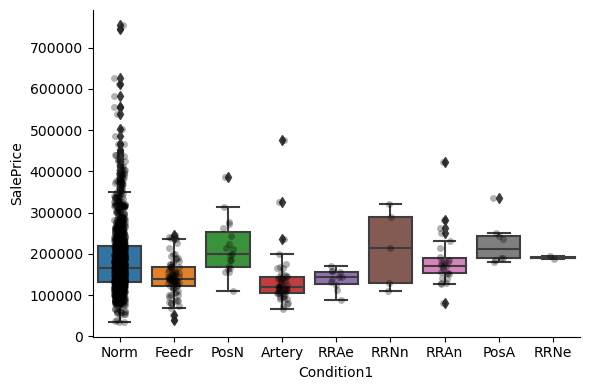

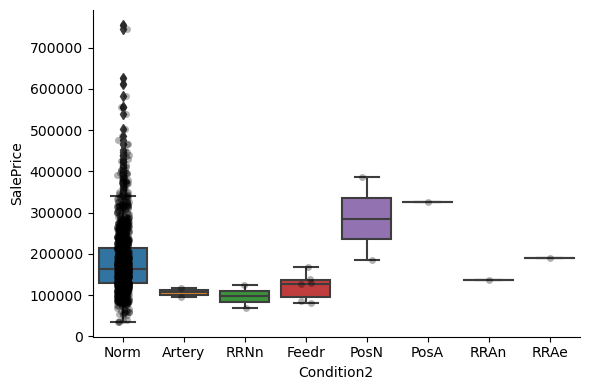

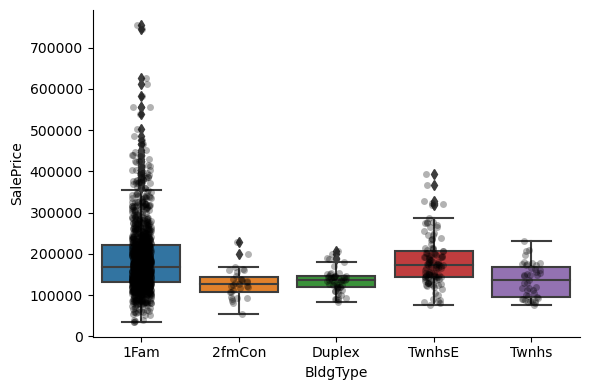

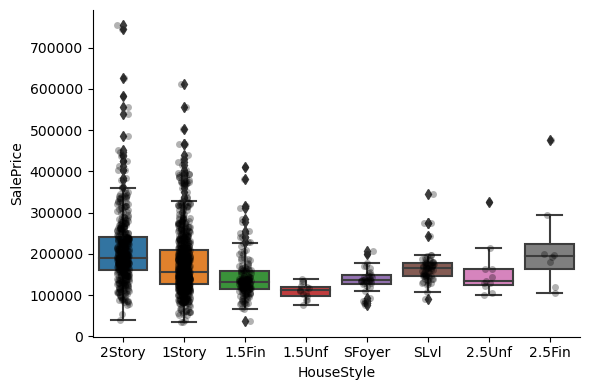

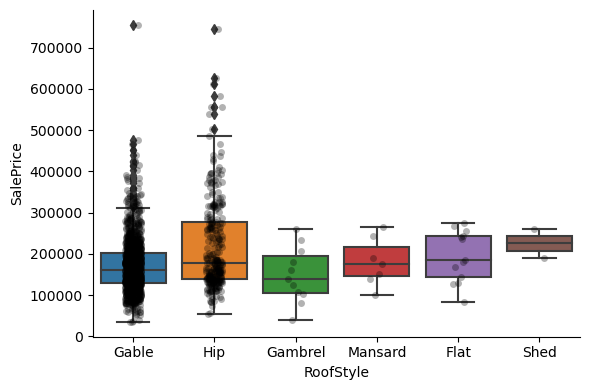

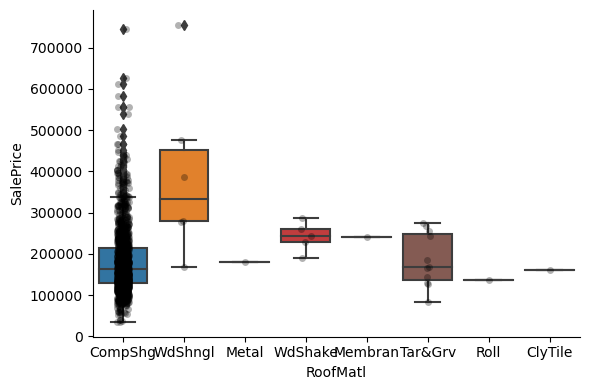

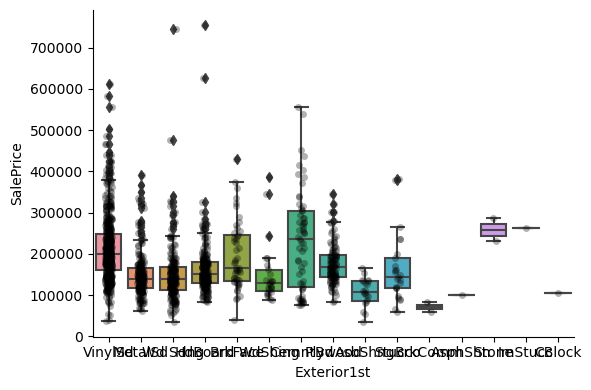

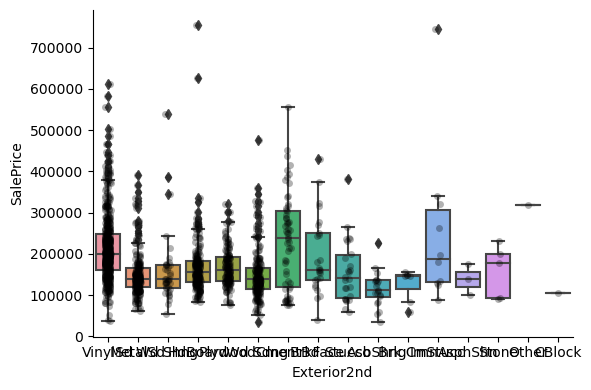

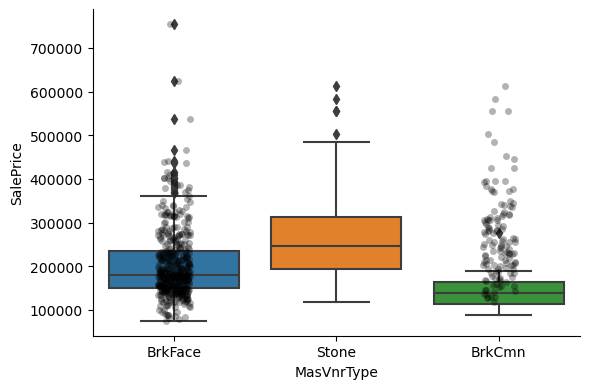

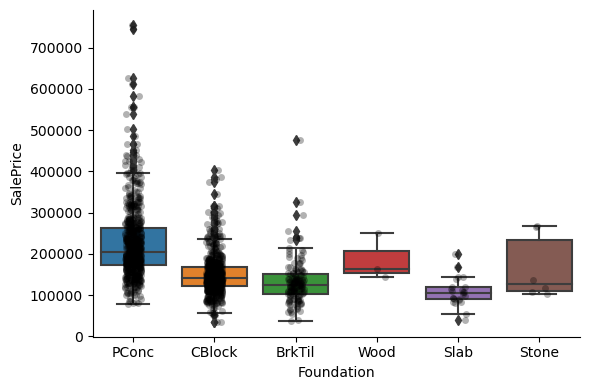

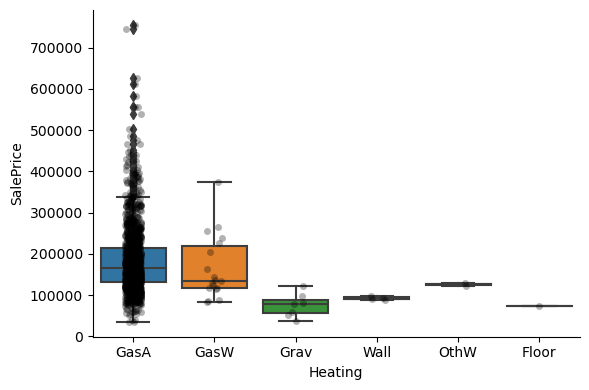

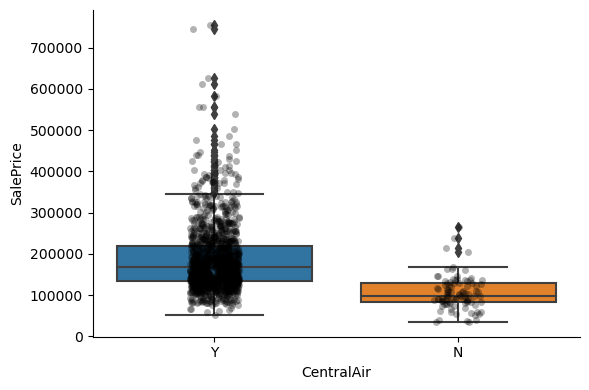

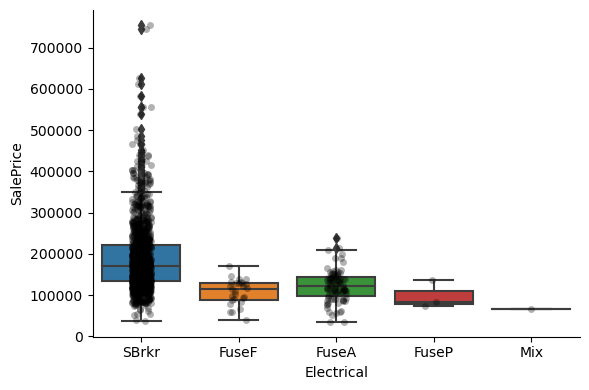

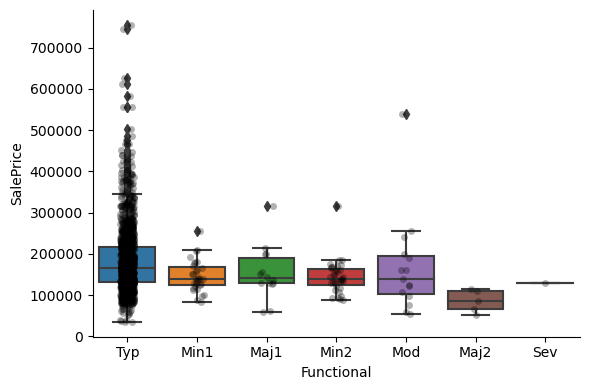

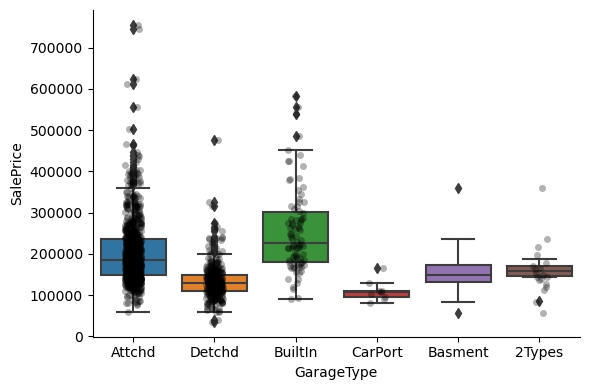

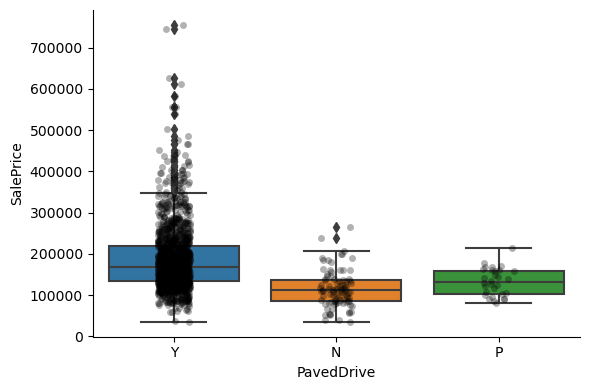

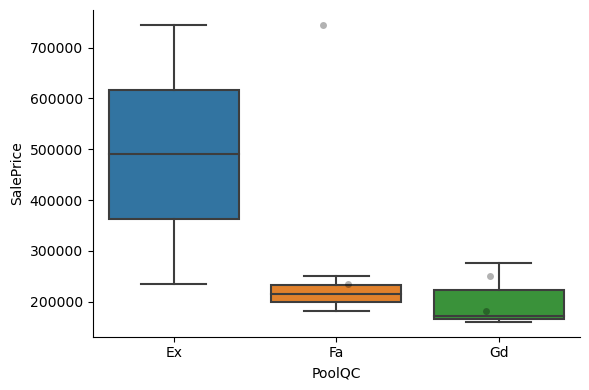

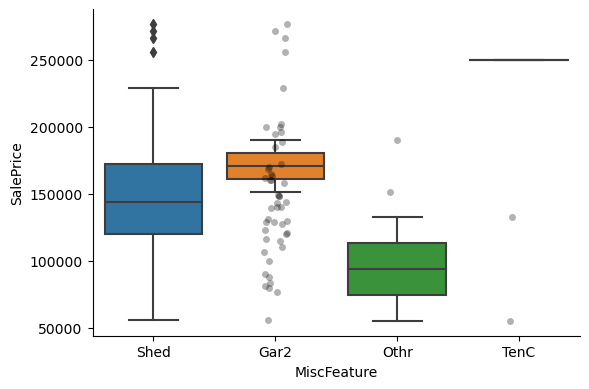

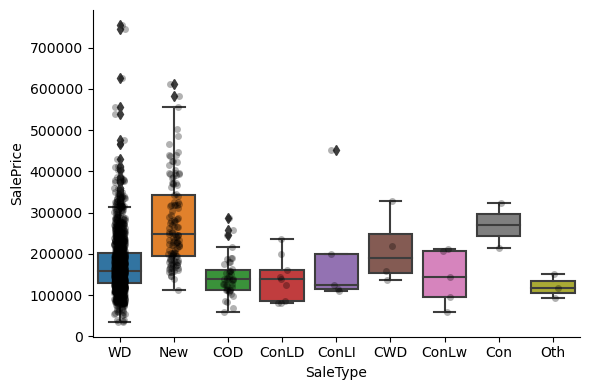

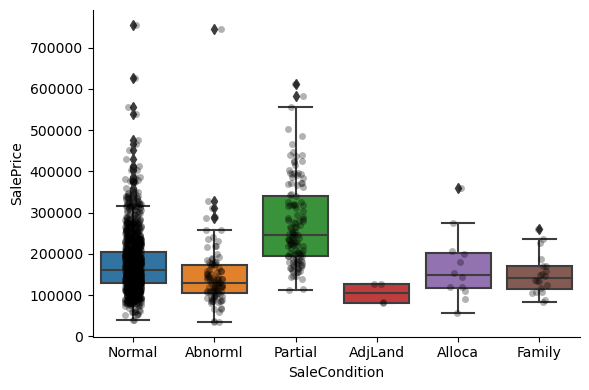

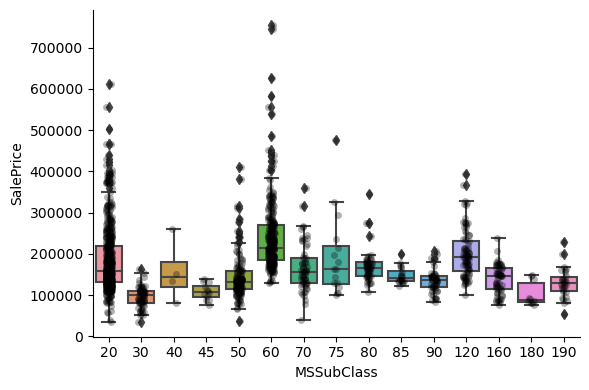

In [82]:
for var in cat_others:
    # make boxplot with Catplot
    sns.catplot(x=var, y='SalePrice', data=data, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

# Separate dataset into train and test

It is important to separate our data intro training and testing set. 

When we engineer features, some techniques learn parameters from data. It is important to learn these parameters only from the train set. This is to avoid over-fitting.

Our feature engineering techniques will learn:

- mean
- mode
- exponents for the yeo-johnson
- category frequency
- and category to number mappings

from the train set.

**Separating the data into train and test involves randomness, therefore, we need to set the seed.**

In [145]:
data = pd.read_csv('train.csv')

# rows and columns of the data
print(data.shape)

# visualise the dataset
data.head()

(1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [146]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Id','SalePrice'], axis=1), # predictive variables
    data['SalePrice'], # target
    test_size=0.1, # portion of dataset to allocate to test set
    random_state=0, # we are setting the seed here
)

X_train.shape, X_test.shape

((1314, 79), (146, 79))

In [147]:
y_train = np.log(y_train)
y_test = np.log(y_test)

In [148]:
cat_vars = [var for var in data.columns if data[var].dtype == 'O']

# MSSubClass is also categorical by definition, despite its numeric values
# (you can find the definitions of the variables in the data_description.txt
# file available on Kaggle, in the same website where you downloaded the data)

# lets add MSSubClass to the list of categorical variables
cat_vars = cat_vars + ['MSSubClass']

# cast all variables as categorical
X_train[cat_vars] = X_train[cat_vars].astype('O')
X_test[cat_vars] = X_test[cat_vars].astype('O')

# number of categorical variables
len(cat_vars)

44

In [149]:
cat_vars_with_na=[var for var in cat_vars if X_train[var].isnull().sum()>0]

In [150]:
X_train[cat_vars_with_na].isnull().mean().sort_values(ascending=False)

PoolQC          0.995434
MiscFeature     0.961187
Alley           0.938356
Fence           0.814307
MasVnrType      0.601218
FireplaceQu     0.472603
GarageType      0.056317
GarageFinish    0.056317
GarageQual      0.056317
GarageCond      0.056317
BsmtExposure    0.025114
BsmtFinType2    0.025114
BsmtQual        0.024353
BsmtCond        0.024353
BsmtFinType1    0.024353
Electrical      0.000761
dtype: float64

In [151]:
with_string_missing=[var for var in cat_vars_with_na if X_train[var].isnull().mean()>0.1]
with_frequent_category=[
    var for var in cat_vars_with_na if X_train[var].isnull().mean()<0.1 
]

In [152]:
with_string_missing

['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [153]:
X_train[with_string_missing]=X_train[with_string_missing].fillna('Missing')
X_test[with_string_missing]=X_test[with_string_missing].fillna('Missing')

In [154]:
for var in with_frequent_category:
    mode=X_train[var].mode()[0]
    print(var,mode)
    X_train[var].fillna(mode,inplace=True)
    X_test[var].fillna(mode,inplace=True)

BsmtQual TA
BsmtCond TA
BsmtExposure No
BsmtFinType1 Unf
BsmtFinType2 Unf
Electrical SBrkr
GarageType Attchd
GarageFinish Unf
GarageQual TA
GarageCond TA


In [155]:
X_train[cat_vars_with_na].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [156]:
num_vars = [
    var for var in X_train.columns if var not in cat_vars and var != 'SalePrice'
]

# number of numerical variables
len(num_vars)

35

In [157]:
vars_with_na=[var for var in num_vars 
             if X_train[var].isnull().sum()>0]
X_train[vars_with_na].isnull().mean()

LotFrontage    0.177321
MasVnrArea     0.004566
GarageYrBlt    0.056317
dtype: float64

In [158]:
for var in vars_with_na:
    mean_val=X_train[var].mean()
    print(var,mean_val)
    X_train[var + "_na"]=np.where(X_train[var].isnull(),1,0)
    X_test[var + "_na"]=np.where(X_test[var].isnull(),1,0)
    X_train[var].fillna(mean_val,inplace=True)
    X_test[var].fillna(mean_val,inplace=True)
X_train[vars_with_na].isnull().sum()

LotFrontage 69.87974098057354
MasVnrArea 103.7974006116208
GarageYrBlt 1978.2959677419356


LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [159]:
[var for var in vars_with_na if X_test[var].isnull().sum() > 0]

[]

In [160]:
X_train[['LotFrontage_na', 'MasVnrArea_na', 'GarageYrBlt_na']].head()

LotFrontage_na  MasVnrArea_na  GarageYrBlt_na
930                0              0               0
656                0              0               0
45                 0              0               0
1348               1              0               0
55                 0              0               0

## Temporal variables

### Capture elapsed time

In [161]:
def elapsed_years(df,var):
    df[var]=df['YrSold']-df[var]
    return df

In [162]:
for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    X_train = elapsed_years(X_train, var)
    X_test = elapsed_years(X_test, var)

In [163]:
X_train.drop(['YrSold'], axis=1, inplace=True)
X_test.drop(['YrSold'], axis=1, inplace=True)

In [164]:
for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:
    X_train[var] = np.log(X_train[var])
    X_test[var] = np.log(X_test[var])

In [165]:
X_train['LotArea'],param=stats.yeojohnson(X_train['LotArea'])
X_test['LotArea']=stats.yeojohnson(X_test['LotArea'],lmbda=param)
print(param)

0.017755558882009546


In [166]:
[var for var in X_train.columns if X_train[var].isnull().sum() > 0]

[]

In [167]:
[var for var in X_train.columns if X_test[var].isnull().sum() > 0]

[]

In [168]:
skewed = [
    'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'MiscVal'
]

In [169]:
X_train[skewed].describe()

BsmtFinSF2  LowQualFinSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1314.000000   1314.000000    1314.000000  1314.000000  1314.000000   
mean     45.291476      6.010654      22.148402     3.170472    14.681126   
std     158.313853     49.352208      61.721089    28.600564    54.860797   
min       0.000000      0.000000       0.000000     0.000000     0.000000   
25%       0.000000      0.000000       0.000000     0.000000     0.000000   
50%       0.000000      0.000000       0.000000     0.000000     0.000000   
75%       0.000000      0.000000       0.000000     0.000000     0.000000   
max    1474.000000    572.000000     552.000000   508.000000   480.000000   

            MiscVal  
count   1314.000000  
mean      47.331811  
std      522.227172  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max    15500.000000

In [170]:
for var in skewed:
    X_train[var]=np.where(X_train[var]==0,0,1)
    X_test[var]=np.where(X_test[var]==0,0,1)

## Categorical variables

In [171]:
# re-map strings to numbers, which determine quality

qual_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
             'HeatingQC', 'KitchenQual', 'FireplaceQu',
             'GarageQual', 'GarageCond',
            ]

for var in qual_vars:
    X_train[var] = X_train[var].map(qual_mappings)
    X_test[var] = X_test[var].map(qual_mappings)

In [172]:
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}

var = 'BsmtExposure'

X_train[var] = X_train[var].map(exposure_mappings)
X_test[var] = X_test[var].map(exposure_mappings)

In [173]:
finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_vars = ['BsmtFinType1', 'BsmtFinType2']

for var in finish_vars:
    X_train[var] = X_train[var].map(finish_mappings)
    X_test[var] = X_test[var].map(finish_mappings)

In [174]:
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'GarageFinish'

X_train[var] = X_train[var].map(garage_mappings)
X_test[var] = X_test[var].map(garage_mappings)

In [175]:
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var = 'Fence'

X_train[var] = X_train[var].map(fence_mappings)
X_test[var] = X_test[var].map(fence_mappings)

In [176]:
[var for var in X_train.columns if X_train[var].isnull().sum() > 0]

[]

In [177]:
qual_vars  = qual_vars + finish_vars + ['BsmtExposure','GarageFinish','Fence']

# capture the remaining categorical variables
# (those that we did not re-map)

cat_others = [
    var for var in cat_vars if var not in qual_vars
]

len(cat_others)

30

In [178]:
def find_frequenct_labels(df,var,rare_perc):
    df=df.copy()
    tmp=df.groupby(var)[var].count()/len(df)
    return tmp[tmp>rare_perc].index
for var in cat_others:
    frequency_ls =find_frequenct_labels(X_train,var,0.01)
    print(var,frequency_ls)
    print()
    X_train[var]=np.where(X_train[var].isin(frequency_ls),X_train[var], 'Rare')
    X_test[var]=np.where(X_test[var].isin(frequency_ls),X_test[var], 'Rare')

MSZoning Index(['FV', 'RH', 'RL', 'RM'], dtype='object', name='MSZoning')

Street Index(['Pave'], dtype='object', name='Street')

Alley Index(['Grvl', 'Missing', 'Pave'], dtype='object', name='Alley')

LotShape Index(['IR1', 'IR2', 'Reg'], dtype='object', name='LotShape')

LandContour Index(['Bnk', 'HLS', 'Low', 'Lvl'], dtype='object', name='LandContour')

Utilities Index(['AllPub'], dtype='object', name='Utilities')

LotConfig Index(['Corner', 'CulDSac', 'FR2', 'Inside'], dtype='object', name='LotConfig')

LandSlope Index(['Gtl', 'Mod'], dtype='object', name='LandSlope')

Neighborhood Index(['Blmngtn', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor',
       'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NWAmes',
       'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW',
       'Somerst', 'StoneBr', 'Timber'],
      dtype='object', name='Neighborhood')

Condition1 Index(['Artery', 'Feedr', 'Norm', 'PosN', 'RRAn'], dtype='object', name='Condition1')

Con

In [180]:
def replace_categories(train,test,y_train,var,target):
    tmp=pd.concat([X_train,y_train],axis=1)
    ordered_labels=tmp.groupby([var])[target].mean().sort_values().index
    ordinal_label={k:i for i,k in enumerate(ordered_labels,0)}
    print(var,ordinal_label)
    print()
    X_train[var] = train[var].map(ordinal_label)
    X_test[var] = test[var].map(ordinal_label)

In [181]:
for var in cat_others:
    replace_categories(X_train, X_test, y_train, var, 'SalePrice')

MSZoning {'Rare': 0, 'RM': 1, 'RH': 2, 'RL': 3, 'FV': 4}

Street {'Rare': 0, 'Pave': 1}

Alley {'Grvl': 0, 'Pave': 1, 'Missing': 2}

LotShape {'Reg': 0, 'IR1': 1, 'Rare': 2, 'IR2': 3}

LandContour {'Bnk': 0, 'Lvl': 1, 'Low': 2, 'HLS': 3}

Utilities {'Rare': 0, 'AllPub': 1}

LotConfig {'Inside': 0, 'FR2': 1, 'Corner': 2, 'Rare': 3, 'CulDSac': 4}

LandSlope {'Gtl': 0, 'Mod': 1, 'Rare': 2}

Neighborhood {'IDOTRR': 0, 'MeadowV': 1, 'BrDale': 2, 'Edwards': 3, 'BrkSide': 4, 'OldTown': 5, 'Sawyer': 6, 'SWISU': 7, 'NAmes': 8, 'Mitchel': 9, 'SawyerW': 10, 'Rare': 11, 'NWAmes': 12, 'Gilbert': 13, 'Blmngtn': 14, 'CollgCr': 15, 'Crawfor': 16, 'ClearCr': 17, 'Somerst': 18, 'Timber': 19, 'StoneBr': 20, 'NridgHt': 21, 'NoRidge': 22}

Condition1 {'Artery': 0, 'Feedr': 1, 'Norm': 2, 'RRAn': 3, 'Rare': 4, 'PosN': 5}

Condition2 {'Rare': 0, 'Norm': 1}

BldgType {'2fmCon': 0, 'Duplex': 1, 'Twnhs': 2, '1Fam': 3, 'TwnhsE': 4}

HouseStyle {'SFoyer': 0, '1.5Fin': 1, 'Rare': 2, '1Story': 3, 'SLvl': 4, '2Story'

In [182]:
[var for var in X_train.columns if X_train[var].isnull().sum() > 0]

[]

In [183]:
[var for var in X_test.columns if X_test[var].isnull().sum() > 0]

[]

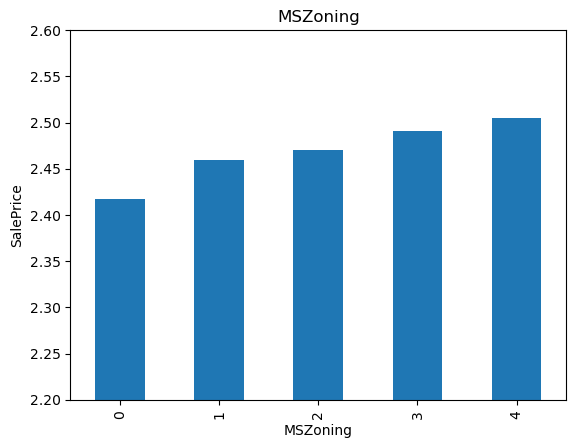

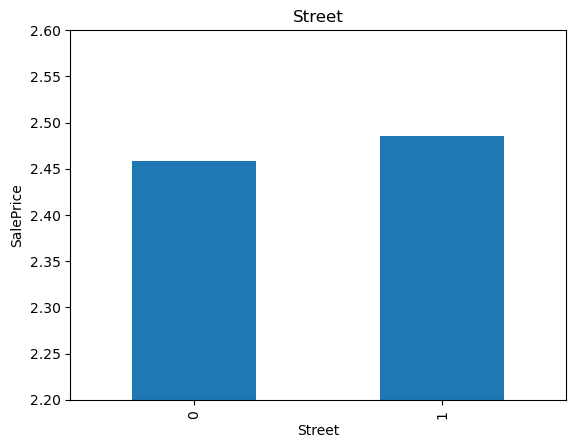

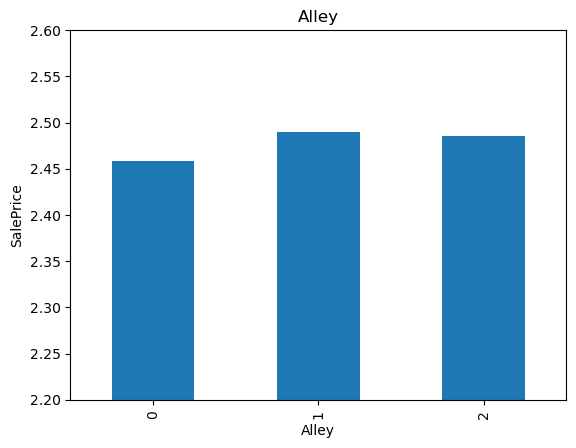

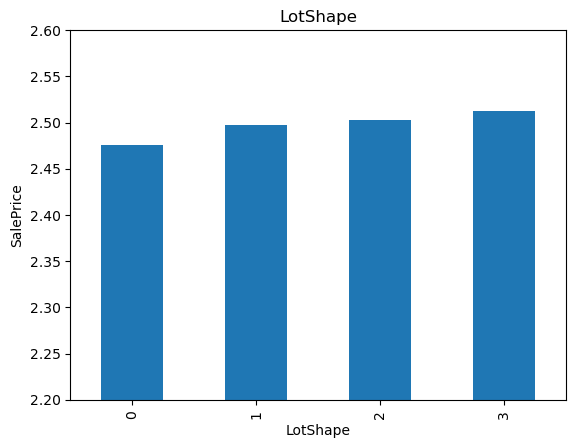

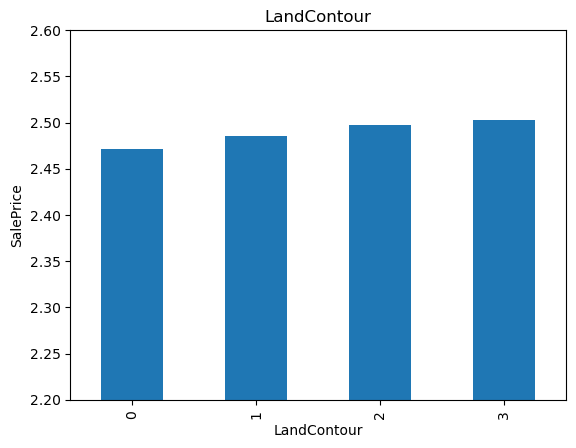

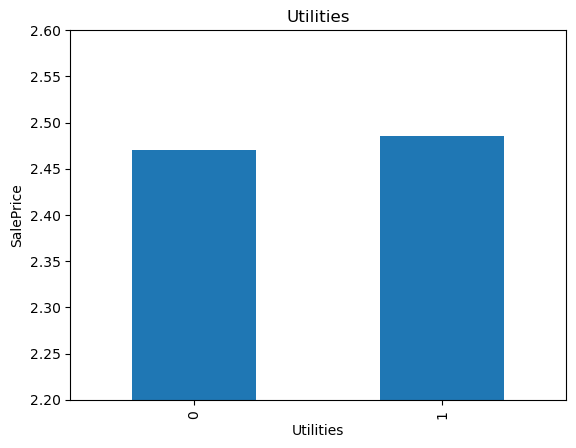

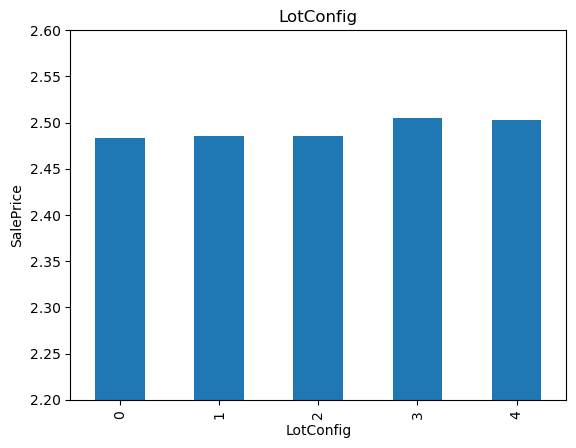

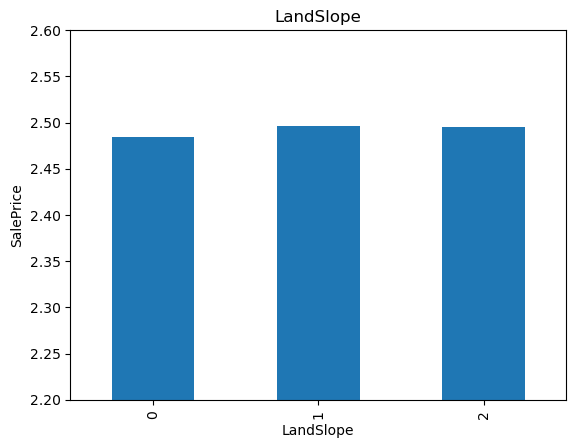

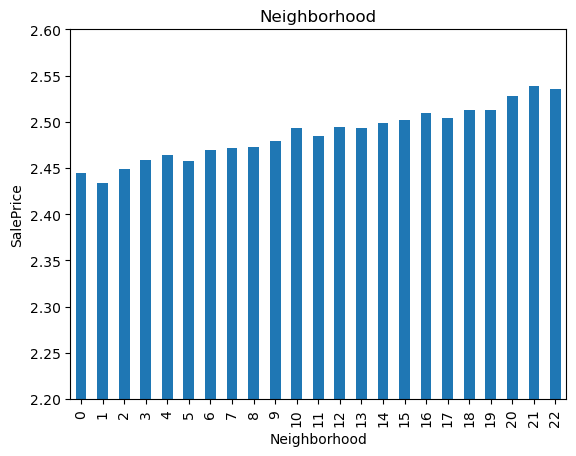

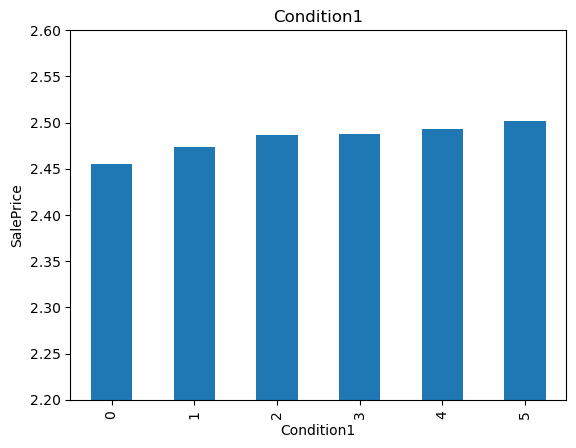

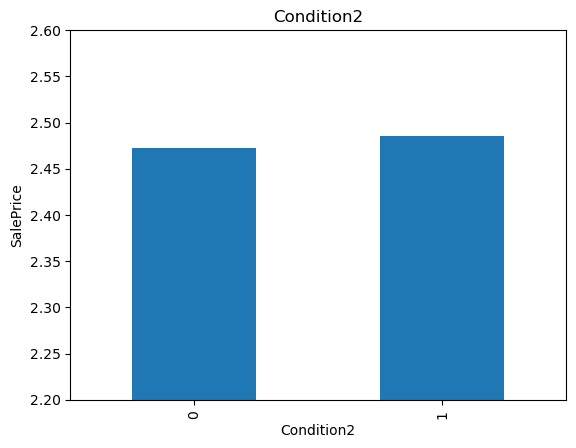

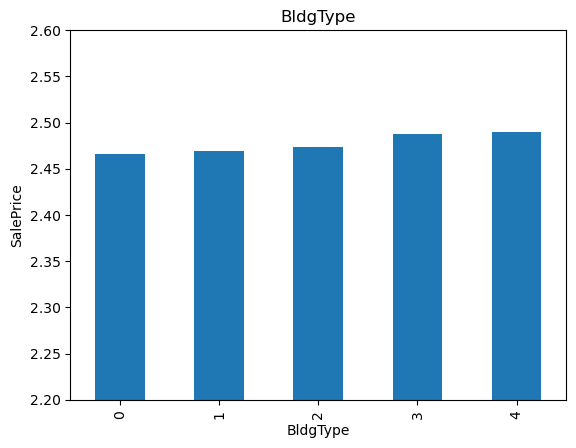

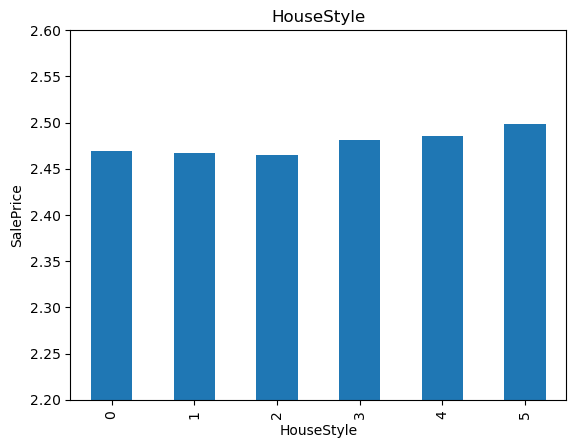

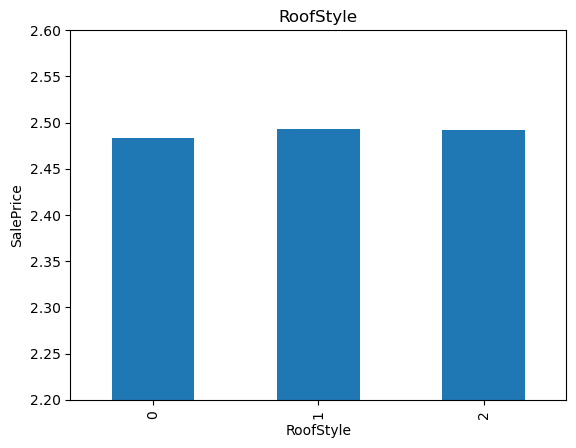

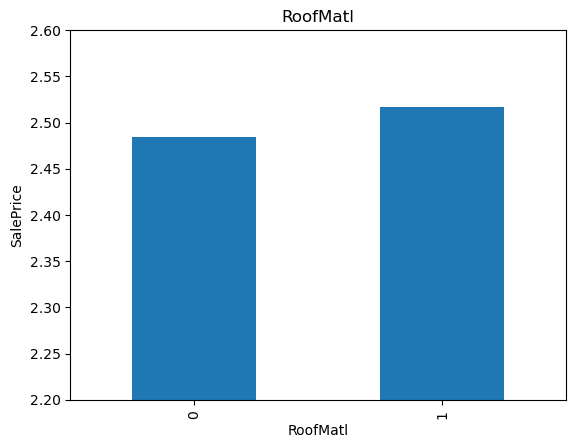

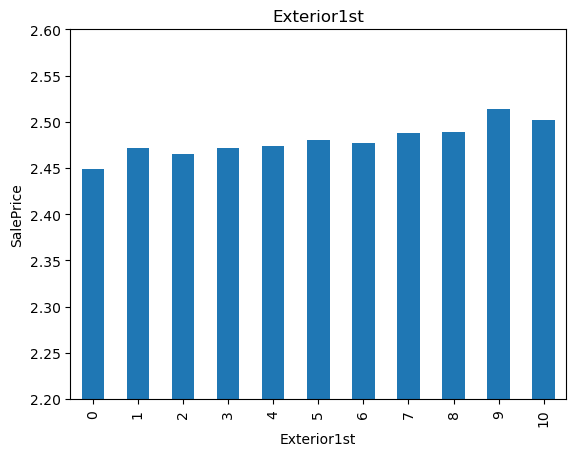

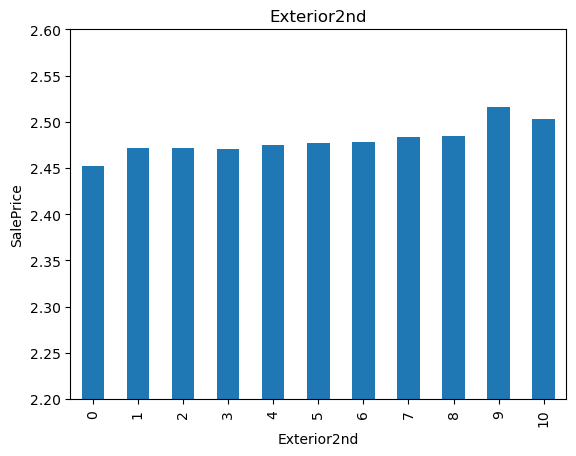

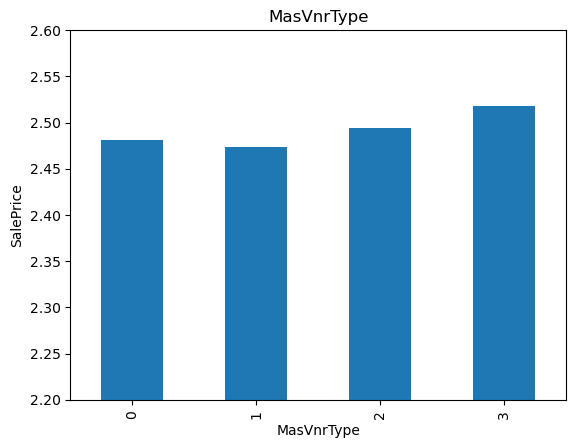

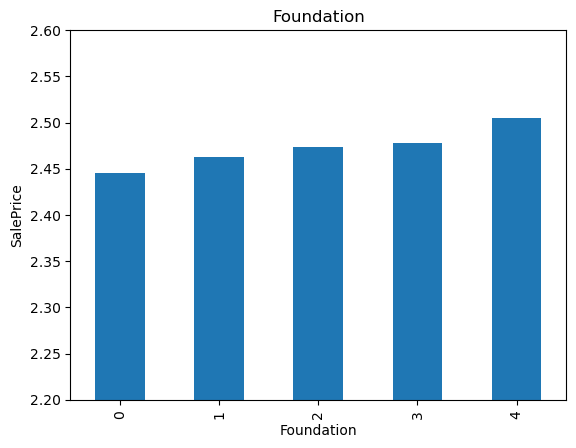

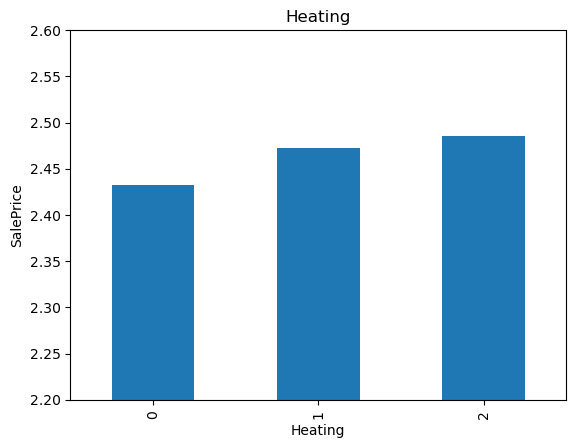

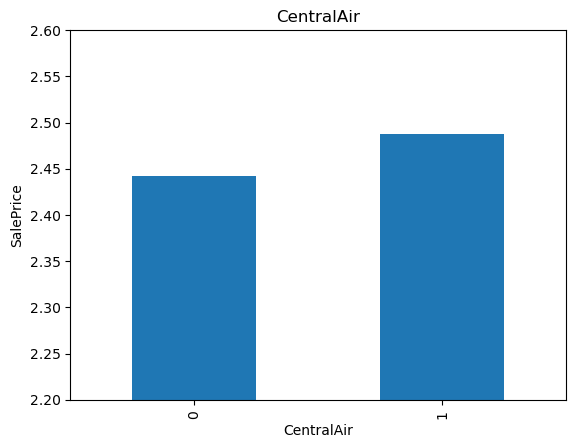

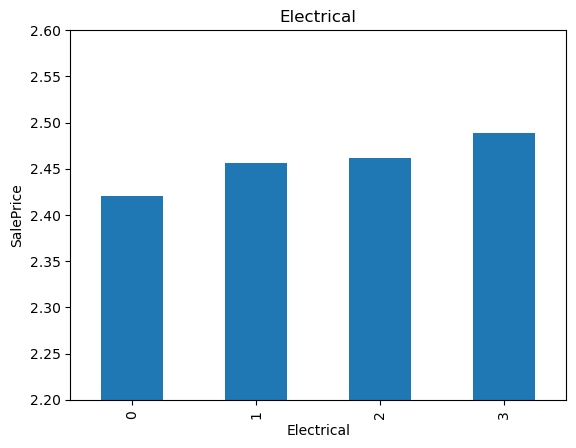

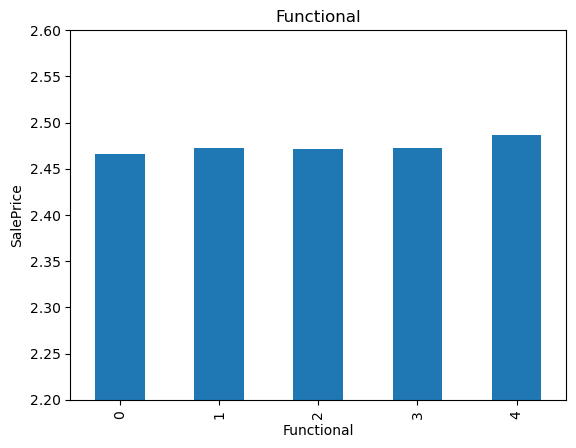

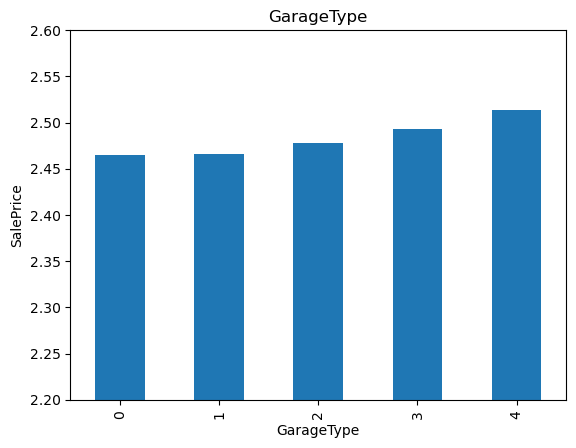

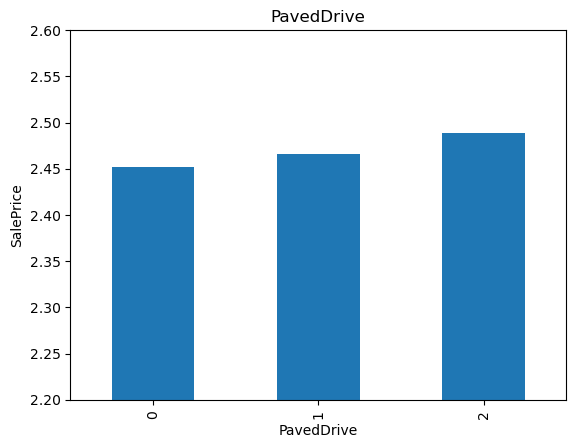

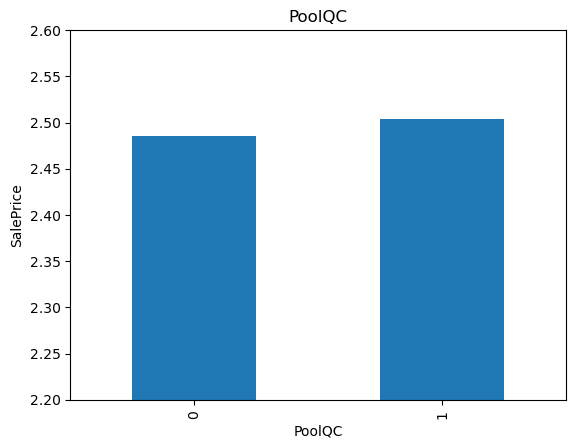

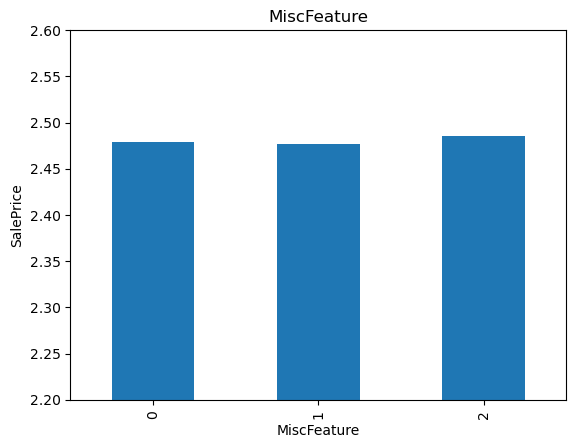

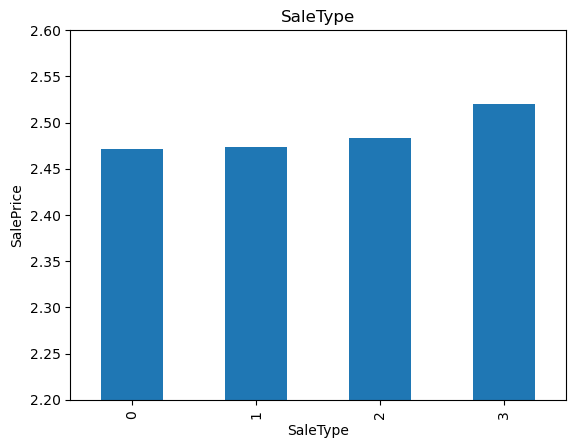

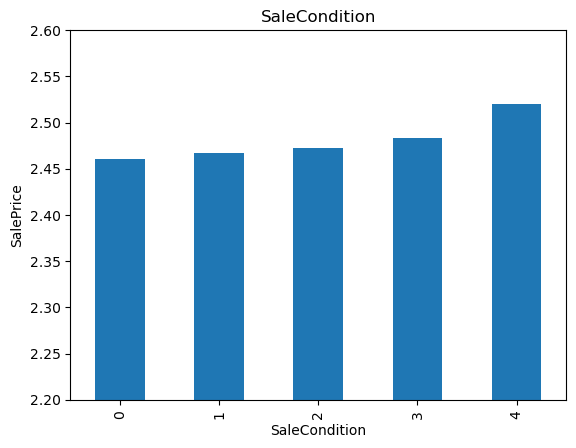

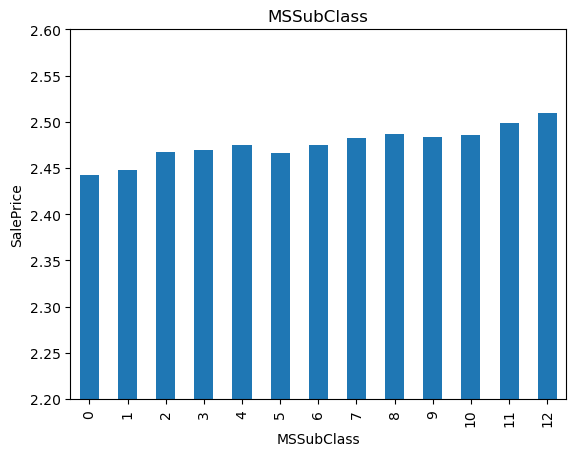

In [184]:
def analyse_vars(train, y_train, var):
    
    # function plots median house sale price per encoded
    # category
    
    tmp = pd.concat([X_train, np.log(y_train)], axis=1)
    
    tmp.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.ylim(2.2, 2.6)
    plt.ylabel('SalePrice')
    plt.show()
    
for var in cat_others:
    analyse_vars(X_train, y_train, var)

In [185]:
# create scaler
scaler = MinMaxScaler()

#  fit  the scaler to the train set
scaler.fit(X_train) 

# transform the train and test set

# sklearn returns numpy arrays, so we wrap the
# array with a pandas dataframe

X_train = pd.DataFrame(
    scaler.transform(X_train),
    columns=X_train.columns
)

X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_train.columns
)

In [186]:
X_train.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0    0.750000      0.75     0.461171  0.366365     1.0    1.0  0.333333   
1    0.750000      0.75     0.456066  0.388528     1.0    1.0  0.333333   
2    0.916667      0.75     0.394699  0.336782     1.0    1.0  0.000000   
3    0.750000      0.75     0.445002  0.482280     1.0    1.0  0.666667   
4    0.750000      0.75     0.577658  0.391756     1.0    1.0  0.333333   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0     1.000000        1.0        0.0        0.0      0.863636         0.4   
1     0.333333        1.0        0.0        0.0      0.363636         0.4   
2     0.333333        1.0        0.0        0.0      0.954545         0.4   
3     0.666667        1.0        0.0        0.0      0.454545         0.4   
4     0.333333        1.0        0.0        0.0      0.363636         0.4   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0         1.0      0.75         0.6     0.777778         0.50   0.014706   
1         1.0      0.75         0.6     0.444444         0.75   0.360294   
2         1.0      1.00         0.6     0.888889         0.50   0.036765   
3         1.0      0.75         0.6     0.666667         0.50   0.066176   
4         1.0      0.75         0.6     0.555556         0.50   0.323529   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0      0.049180        0.0       0.0          1.0          1.0    0.333333   
1      0.049180        0.0       0.0          0.6          0.6    0.666667   
2      0.098361        1.0       0.0          0.3          0.2    0.666667   
3      0.163934        0.0       0.0          1.0          1.0    0.333333   
4      0.737705        0.0       0.0          0.6          0.7    0.666667   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0     0.00000   0.666667        0.5         1.0  0.666667  0.666667   
1     0.03375   0.666667        0.5         0.5  0.333333  0.666667   
2     0.25750   1.000000        0.5         1.0  1.000000  0.666667   
3     0.00000   0.666667        0.5         1.0  0.666667  0.666667   
4     0.17000   0.333333        0.5         0.5  0.333333  0.666667   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0      0.666667           1.0    0.002835           0.0         0.0   
1      0.000000           0.8    0.142807           0.0         0.0   
2      0.000000           1.0    0.080794           0.0         0.0   
3      1.000000           1.0    0.255670           0.0         0.0   
4      0.000000           0.6    0.086818           0.0         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0   0.673479     0.239935      1.0       1.00         1.0         1.0   
1   0.114724     0.172340      1.0       1.00         1.0         1.0   
2   0.601951     0.286743      1.0       1.00         1.0         1.0   
3   0.018114     0.242553      1.0       1.00         1.0         1.0   
4   0.434278     0.233224      1.0       0.75         1.0         1.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  0.559760       0.0           0.0   0.523250      0.000000           0.0   
1  0.434539       0.0           0.0   0.406196      0.333333           0.0   
2  0.627205       0.0           0.0   0.586296      0.333333           0.0   
3  0.566920       0.0           0.0   0.529943      0.333333           0.0   
4  0.549026       0.0           0.0   0.513216      0.000000           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0  0.666667       0.0         0.375      0.333333     0.666667      0.416667   
1  0.333333       0.5         0.375      0.333333     0.666667      0.250000   
2  0.666667       0.0         0.250      0.333333     1.000000      0.333333   
3  0.666667       0.0         0.375      0.333333     0.666667      0.250000   
4

In [187]:
X_train.to_csv('xtrain.csv', index=False)
X_test.to_csv('xtest.csv', index=False)

y_train.to_csv('ytrain.csv', index=False)
y_test.to_csv('ytest.csv', index=False)

In [188]:
joblib.dump(scaler, 'minmax_scaler.joblib') 

['minmax_scaler.joblib']

# Machine Learning  - Feature Selection

In [190]:
X_train = pd.read_csv('xtrain.csv')
X_test = pd.read_csv('xtest.csv')

X_train.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0    0.750000      0.75     0.461171  0.366365     1.0    1.0  0.333333   
1    0.750000      0.75     0.456066  0.388528     1.0    1.0  0.333333   
2    0.916667      0.75     0.394699  0.336782     1.0    1.0  0.000000   
3    0.750000      0.75     0.445002  0.482280     1.0    1.0  0.666667   
4    0.750000      0.75     0.577658  0.391756     1.0    1.0  0.333333   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0     1.000000        1.0        0.0        0.0      0.863636         0.4   
1     0.333333        1.0        0.0        0.0      0.363636         0.4   
2     0.333333        1.0        0.0        0.0      0.954545         0.4   
3     0.666667        1.0        0.0        0.0      0.454545         0.4   
4     0.333333        1.0        0.0        0.0      0.363636         0.4   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0         1.0      0.75         0.6     0.777778         0.50   0.014706   
1         1.0      0.75         0.6     0.444444         0.75   0.360294   
2         1.0      1.00         0.6     0.888889         0.50   0.036765   
3         1.0      0.75         0.6     0.666667         0.50   0.066176   
4         1.0      0.75         0.6     0.555556         0.50   0.323529   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0      0.049180        0.0       0.0          1.0          1.0    0.333333   
1      0.049180        0.0       0.0          0.6          0.6    0.666667   
2      0.098361        1.0       0.0          0.3          0.2    0.666667   
3      0.163934        0.0       0.0          1.0          1.0    0.333333   
4      0.737705        0.0       0.0          0.6          0.7    0.666667   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0     0.00000   0.666667        0.5         1.0  0.666667  0.666667   
1     0.03375   0.666667        0.5         0.5  0.333333  0.666667   
2     0.25750   1.000000        0.5         1.0  1.000000  0.666667   
3     0.00000   0.666667        0.5         1.0  0.666667  0.666667   
4     0.17000   0.333333        0.5         0.5  0.333333  0.666667   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0      0.666667           1.0    0.002835           0.0         0.0   
1      0.000000           0.8    0.142807           0.0         0.0   
2      0.000000           1.0    0.080794           0.0         0.0   
3      1.000000           1.0    0.255670           0.0         0.0   
4      0.000000           0.6    0.086818           0.0         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0   0.673479     0.239935      1.0       1.00         1.0         1.0   
1   0.114724     0.172340      1.0       1.00         1.0         1.0   
2   0.601951     0.286743      1.0       1.00         1.0         1.0   
3   0.018114     0.242553      1.0       1.00         1.0         1.0   
4   0.434278     0.233224      1.0       0.75         1.0         1.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  0.559760       0.0           0.0   0.523250      0.000000           0.0   
1  0.434539       0.0           0.0   0.406196      0.333333           0.0   
2  0.627205       0.0           0.0   0.586296      0.333333           0.0   
3  0.566920       0.0           0.0   0.529943      0.333333           0.0   
4  0.549026       0.0           0.0   0.513216      0.000000           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0  0.666667       0.0         0.375      0.333333     0.666667      0.416667   
1  0.333333       0.5         0.375      0.333333     0.666667      0.250000   
2  0.666667       0.0         0.250      0.333333     1.000000      0.333333   
3  0.666667       0.0         0.375      0.333333     0.666667      0.250000   
4

In [191]:
y_train = pd.read_csv('ytrain.csv')
y_test = pd.read_csv('ytest.csv')

y_train.head()

SalePrice
0  12.211060
1  11.887931
2  12.675764
3  12.278393
4  12.103486

In [192]:
sel_=SelectFromModel(Lasso(alpha=0.001,random_state=0))
sel_.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.001, random_state=0))

In [193]:
sel_.get_support().sum()

36

In [194]:
sel_.get_support()

array([ True,  True, False,  True, False, False,  True,  True, False,
        True, False,  True, False, False, False, False,  True,  True,
       False,  True,  True, False,  True, False, False, False,  True,
       False,  True,  True, False,  True,  True, False, False, False,
       False, False, False,  True,  True, False,  True,  True, False,
        True,  True, False,  True,  True, False, False,  True,  True,
        True,  True,  True, False, False,  True,  True, False, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False])

In [195]:
selected_feats=X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feats)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 81
selected features: 36
features with coefficients shrank to zero: 45


In [196]:
selected_feats

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LandContour',
       'LotConfig', 'Neighborhood', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageFinish', 'GarageCars', 'PavedDrive', 'WoodDeckSF',
       'ScreenPorch', 'SaleCondition'],
      dtype='object')

In [197]:
pd.Series(selected_feats).to_csv('selected_features.csv', index=False)

# Machine Learning  - Model Training


In [199]:
Features=selected_feats

In [200]:
Features

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LandContour',
       'LotConfig', 'Neighborhood', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageFinish', 'GarageCars', 'PavedDrive', 'WoodDeckSF',
       'ScreenPorch', 'SaleCondition'],
      dtype='object')

In [202]:
X_train = X_train[Features]
X_test = X_test[Features]

In [203]:
lin_model = Lasso(alpha=0.001, random_state=0)

# train the model

lin_model.fit(X_train, y_train)

Lasso(alpha=0.001, random_state=0)

In [210]:
pred=lin_model.predict(X_train)
print('train mse: {}'.format(int(mean_squared_error(np.exp(y_train),np.exp(pred)))))
print('train rmse: {}'.format(int(mean_squared_error(np.exp(y_train),np.exp(pred),squared=False))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

pred=lin_model.predict(X_test)
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred), squared=False))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

print('Average house price',int(np.exp(y_train).median()))

train mse: 772198334
train rmse: 27788
train r2: 0.8763262128816209

test mse: 1077066272
test rmse: 32818
test r2: 0.8432700518700363

Average house price 163000


Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

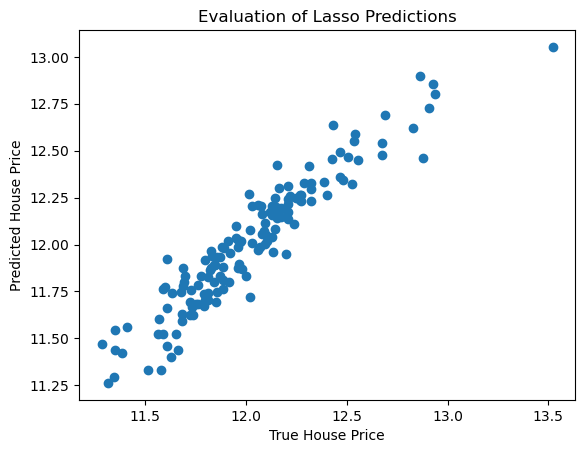

In [211]:
plt.scatter(y_test, lin_model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')

In [212]:
y_test.reset_index(drop=True)

SalePrice
0    12.209188
1    11.798104
2    11.608236
3    12.165251
4    11.385092
..         ...
141  11.884489
142  12.287653
143  11.921718
144  11.598727
145  12.017331

[146 rows x 1 columns]

In [213]:
y_test.reset_index(drop=True, inplace=True)

preds = pd.Series(lin_model.predict(X_test))

preds

0      12.175793
1      11.917238
2      11.662980
3      12.303104
4      11.423063
         ...    
141    11.763792
142    12.329463
143    11.954652
144    11.772995
145    12.077226
Length: 146, dtype: float64

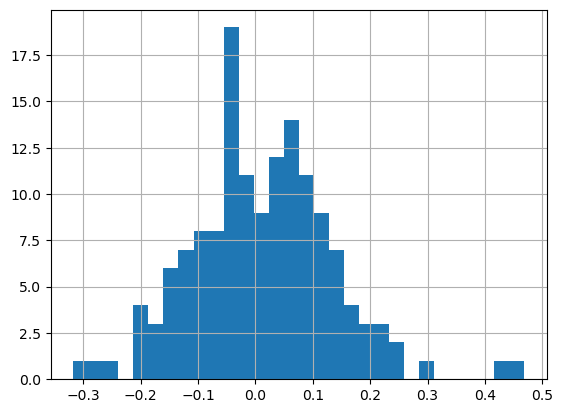

In [214]:
errors = y_test['SalePrice'] - preds
errors.hist(bins=30)
plt.show()

Text(0.5, 1.0, 'Feature Importance')

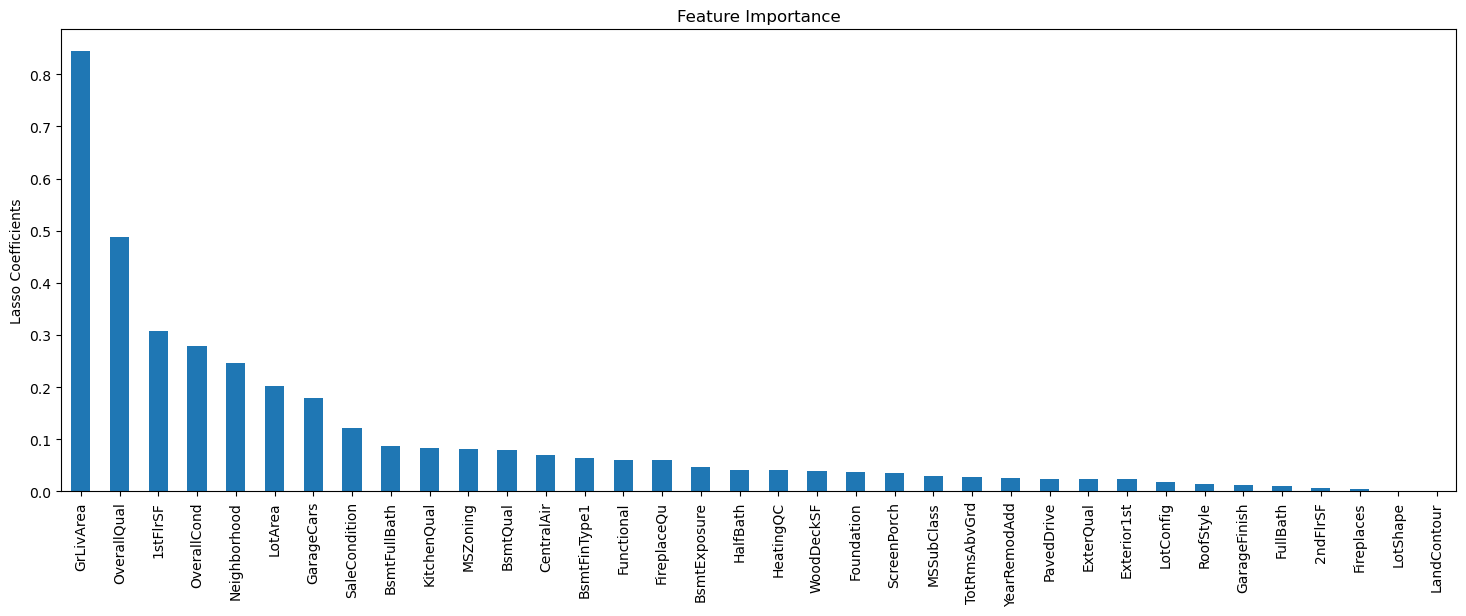

In [218]:
importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = Features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')

In [219]:
joblib.dump(lin_model, 'linear_regression.joblib') 

['linear_regression.joblib']

## optimal value of alpha for ridge and lasso regression

In [221]:
alpha_values=np.logspace(-4,4,50)
alpha_values

array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-02, 8.68511374e-02, 1.26485522e-01,
       1.84206997e-01, 2.68269580e-01, 3.90693994e-01, 5.68986603e-01,
       8.28642773e-01, 1.20679264e+00, 1.75751062e+00, 2.55954792e+00,
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04])

In [223]:
ridge=Ridge()
ridge_params={'alpha':alpha_values}
ridge_search=GridSearchCV(ridge,ridge_params,cv=5,scoring='neg_mean_squared_error')
ridge_search.fit(X_train, y_train)

lasso = Lasso(max_iter=10000)  # Ensure convergence for high alpha values
lasso_params = {'alpha': alpha_values}
lasso_search = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_search.fit(X_train, y_train)

# Best parameters
print("Best alpha for Ridge:", ridge_search.best_params_['alpha'])
print("Best alpha for Lasso:", lasso_search.best_params_['alpha'])

Best alpha for Ridge: 0.5689866029018293
Best alpha for Lasso: 0.00014563484775012445


In [261]:
ridge_best = ridge_search.best_estimator_
lasso_best = lasso_search.best_estimator_
print("Ridge Test MSE:", mean_squared_error(y_test, ridge_best.predict(X_test)))
print("Lasso Test MSE:", mean_squared_error(y_test, lasso_best.predict(X_test)))

Ridge Test MSE: 0.014882080211499666
Lasso Test MSE: 0.015060180145507066


In [225]:
#Lasso
lin_model1 = Lasso(alpha=0.00014563484775012445, random_state=0)

# train the model

lin_model1.fit(X_train, y_train)

Lasso(alpha=0.00014563484775012445, random_state=0)

In [232]:
pred=lin_model1.predict(X_train)
print('train mse: {}'.format(int(mean_squared_error(np.exp(y_train),np.exp(pred)))))
print('train rmse: {}'.format(int(mean_squared_error(np.exp(y_train),np.exp(pred),squared=False))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

pred=lin_model1.predict(X_test)
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred), squared=False))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

print('Average house price',int(np.exp(y_train).median()))

train mse: 748511076
train rmse: 27358
train r2: 0.8801199180708623

test mse: 973020441
test rmse: 31193
test r2: 0.858410343754223

Average house price 163000


Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

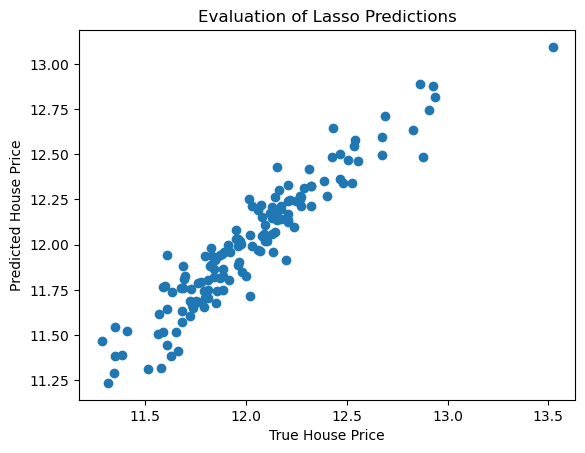

In [233]:
plt.scatter(y_test, lin_model1.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')

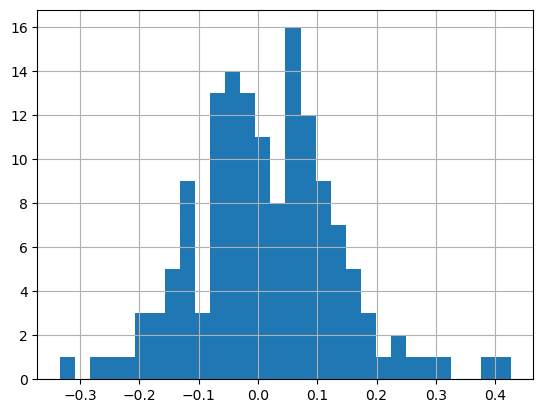

In [237]:
y_test.reset_index(drop=True, inplace=True)

preds = pd.Series(lin_model1.predict(X_test))

preds
errors = y_test['SalePrice'] - preds
errors.hist(bins=30)
plt.show()

Text(0.5, 1.0, 'Feature Importance')

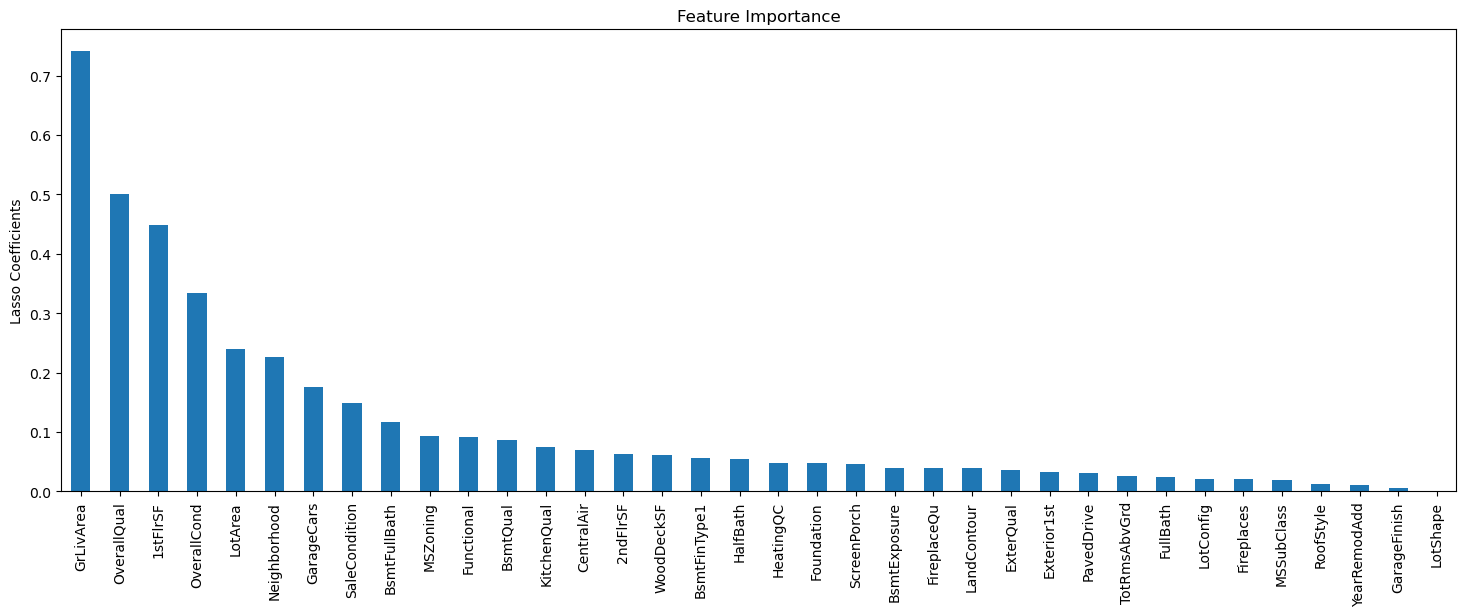

In [235]:
importance = pd.Series(np.abs(lin_model1.coef_.ravel()))
importance.index = Features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')

In [228]:
#Ridge
Rig1=Ridge(alpha=0.5689866029018293,random_state=0)
Rig1.fit(X_train, y_train)

Ridge(alpha=0.5689866029018293, random_state=0)

In [239]:
pred=Rig1.predict(X_train)
print('train mse: {}'.format(int(mean_squared_error(np.exp(y_train),np.exp(pred)))))
print('train rmse: {}'.format(int(mean_squared_error(np.exp(y_train),np.exp(pred),squared=False))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

pred=Rig1.predict(X_test)
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred), squared=False))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

print('Average house price',int(np.exp(y_train).median()))

train mse: 744259903
train rmse: 27281
train r2: 0.8808007777604256

test mse: 946349392
test rmse: 30762
test r2: 0.862291397504775

Average house price 163000


Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

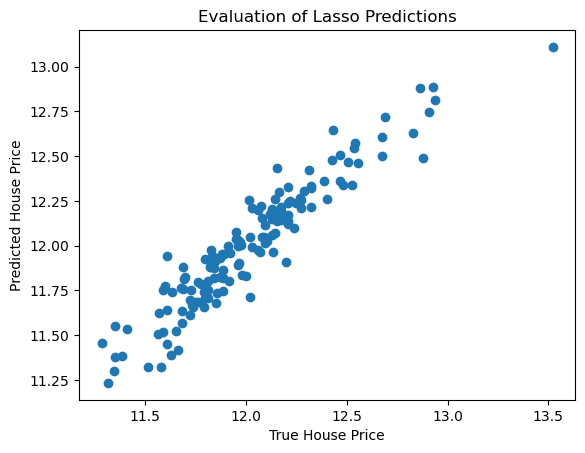

In [240]:
plt.scatter(y_test, Rig1.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')

Text(0.5, 1.0, 'Feature Importance')

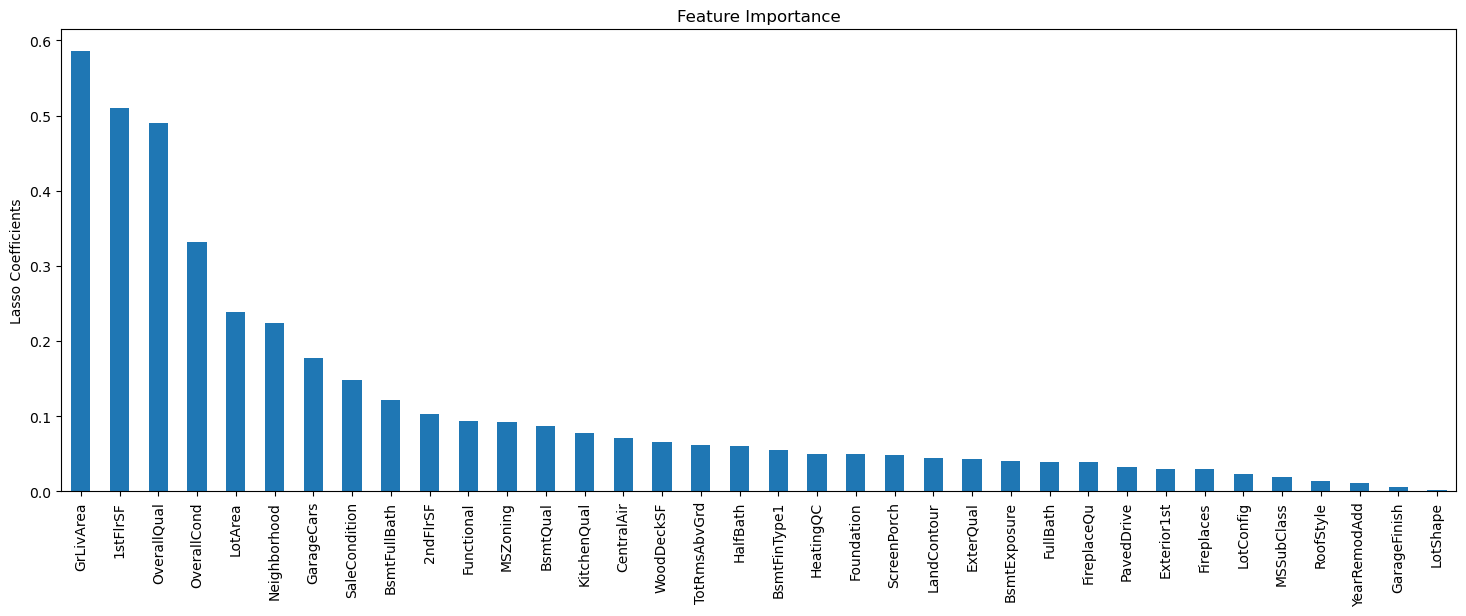

In [256]:
importance = pd.Series(np.abs(Rig1.coef_.ravel()))
importance.index = Features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')

# Questions 
### 1. What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [248]:
# Best alpha for Ridge: 0.5689866029018293
# Best alpha for Lasso: 0.00014563484775012445
# value is double
lin_model2 = Lasso(alpha=0.0003, random_state=0)

# train the model

lin_model2.fit(X_train, y_train)
pred=lin_model2.predict(X_train)
print('train mse: {}'.format(int(mean_squared_error(np.exp(y_train),np.exp(pred)))))
print('train rmse: {}'.format(int(mean_squared_error(np.exp(y_train),np.exp(pred),squared=False))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

pred=lin_model2.predict(X_test)
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred), squared=False))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

print('Average house price',int(np.exp(y_train).median()))

train mse: 750462876
train rmse: 27394
train r2: 0.8798073216684348

test mse: 990285106
test rmse: 31468
test r2: 0.8558980656176987

Average house price 163000


Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

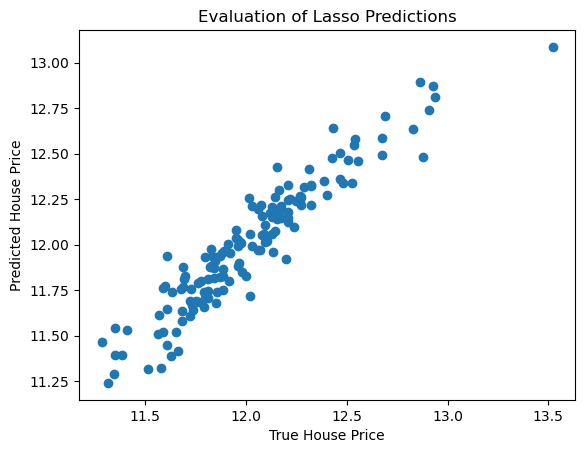

In [249]:
plt.scatter(y_test, lin_model2.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')

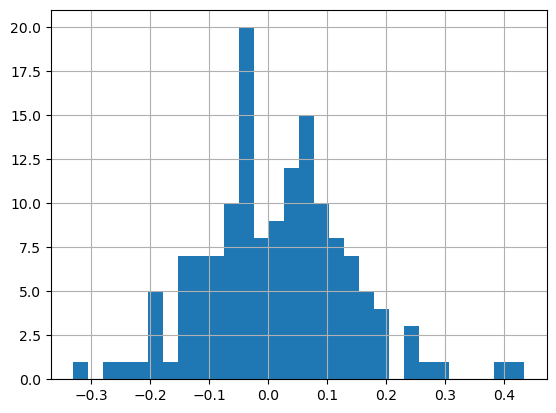

In [250]:
y_test.reset_index(drop=True, inplace=True)

preds = pd.Series(lin_model2.predict(X_test))

preds
errors = y_test['SalePrice'] - preds
errors.hist(bins=30)
plt.show()

Text(0.5, 1.0, 'Feature Importance')

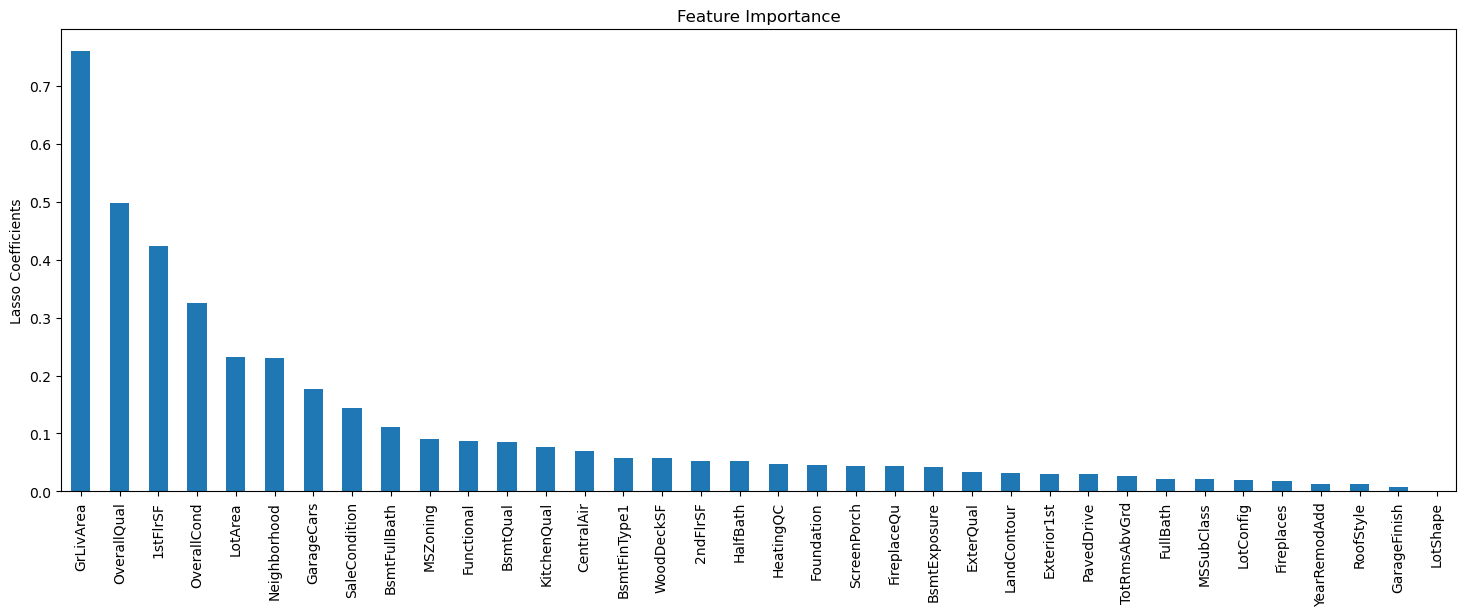

In [251]:
importance = pd.Series(np.abs(lin_model2.coef_.ravel()))
importance.index = Features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')

In [252]:
# lamba double 
Rig2=Ridge(alpha=1.2,random_state=0)
Rig2.fit(X_train, y_train)
pred=Rig2.predict(X_train)
print('train mse: {}'.format(int(mean_squared_error(np.exp(y_train),np.exp(pred)))))
print('train rmse: {}'.format(int(mean_squared_error(np.exp(y_train),np.exp(pred),squared=False))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

pred=Rig2.predict(X_test)
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred), squared=False))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

print('Average house price',int(np.exp(y_train).median()))

train mse: 743636710
train rmse: 27269
train r2: 0.8809005871218163

test mse: 955690649
test rmse: 30914
test r2: 0.8609320987591397

Average house price 163000


Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

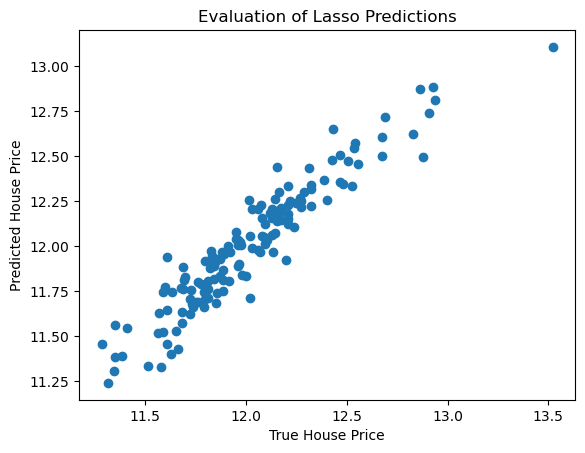

In [253]:
plt.scatter(y_test, Rig2.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')

Text(0.5, 1.0, 'Feature Importance')

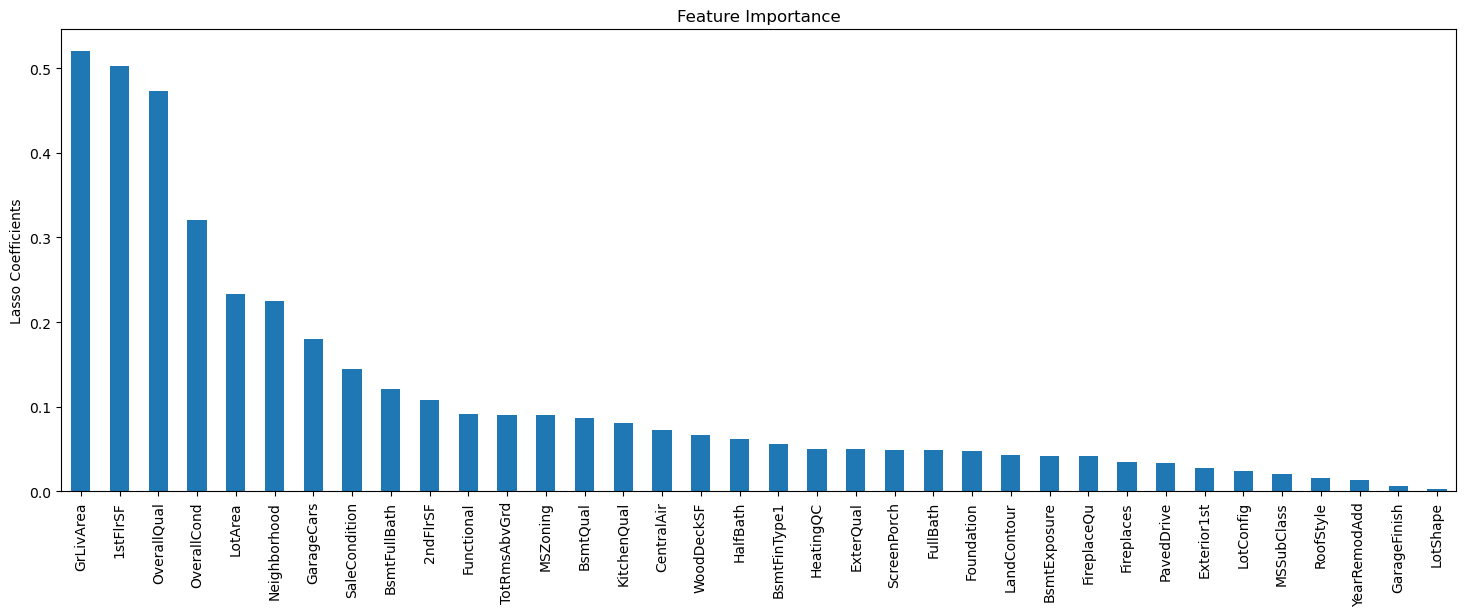

In [255]:
importance = pd.Series(np.abs(Rig2.coef_.ravel()))
importance.index = Features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')

In [260]:
Rig2.feature_names_in_

array(['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LandContour',
       'LotConfig', 'Neighborhood', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageFinish', 'GarageCars', 'PavedDrive', 'WoodDeckSF',
       'ScreenPorch', 'SaleCondition'], dtype=object)

In [263]:
# Ridge: Identify top predictors based on coefficients
ridge_best.set_params(alpha=2 * 0.5689866029018293)
ridge_best.fit(X_train, y_train)
ridge_coefficients = ridge_best.coef_


# Lasso: Identify remaining predictors after regularization
lasso_best.set_params(alpha=2 * 0.00014563484775012445)
lasso_best.fit(X_train, y_train)
lasso_coefficients = lasso_best.coef_
lasso_important_features = X_train.columns[lasso_coefficients != 0]


In [264]:
lasso_important_features

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LandContour',
       'LotConfig', 'Neighborhood', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageFinish', 'GarageCars', 'PavedDrive', 'WoodDeckSF',
       'ScreenPorch', 'SaleCondition'],
      dtype='object')

Text(0.5, 1.0, 'Feature Importance')

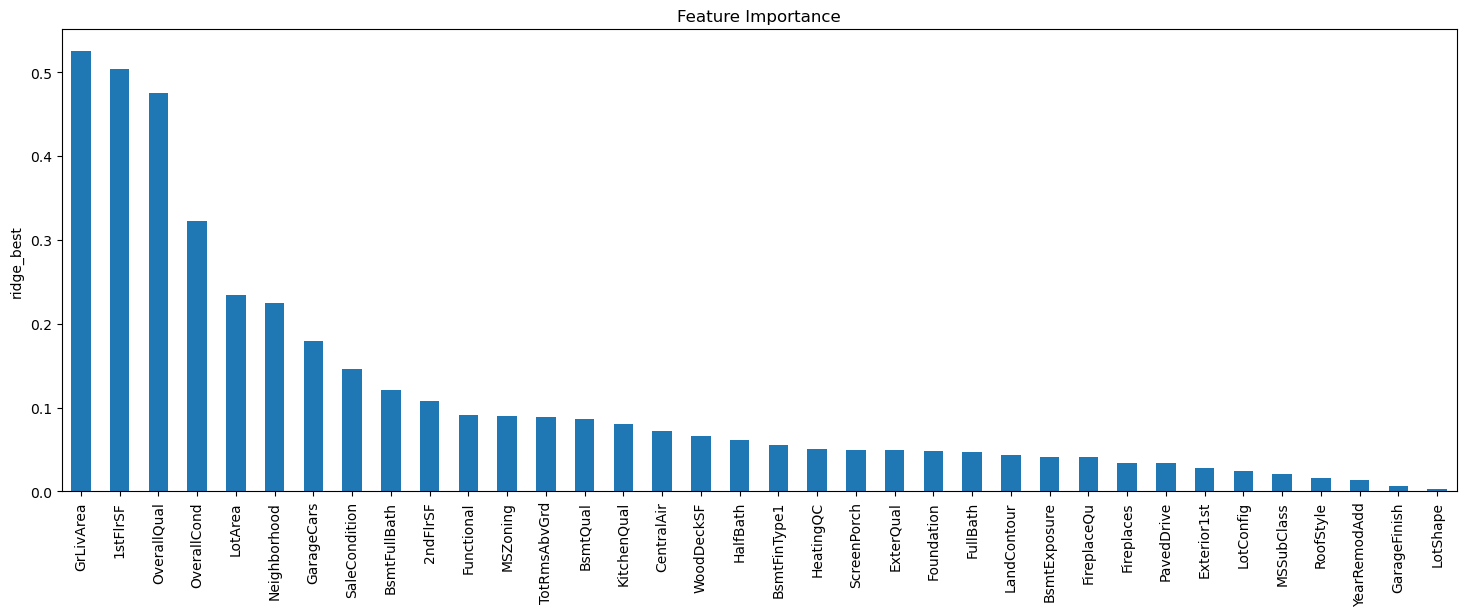

In [266]:
importance = pd.Series(np.abs(ridge_best.coef_.ravel()))
importance.index = Features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('ridge_best')
plt.title('Feature Importance')

Text(0.5, 1.0, 'Feature Importance')

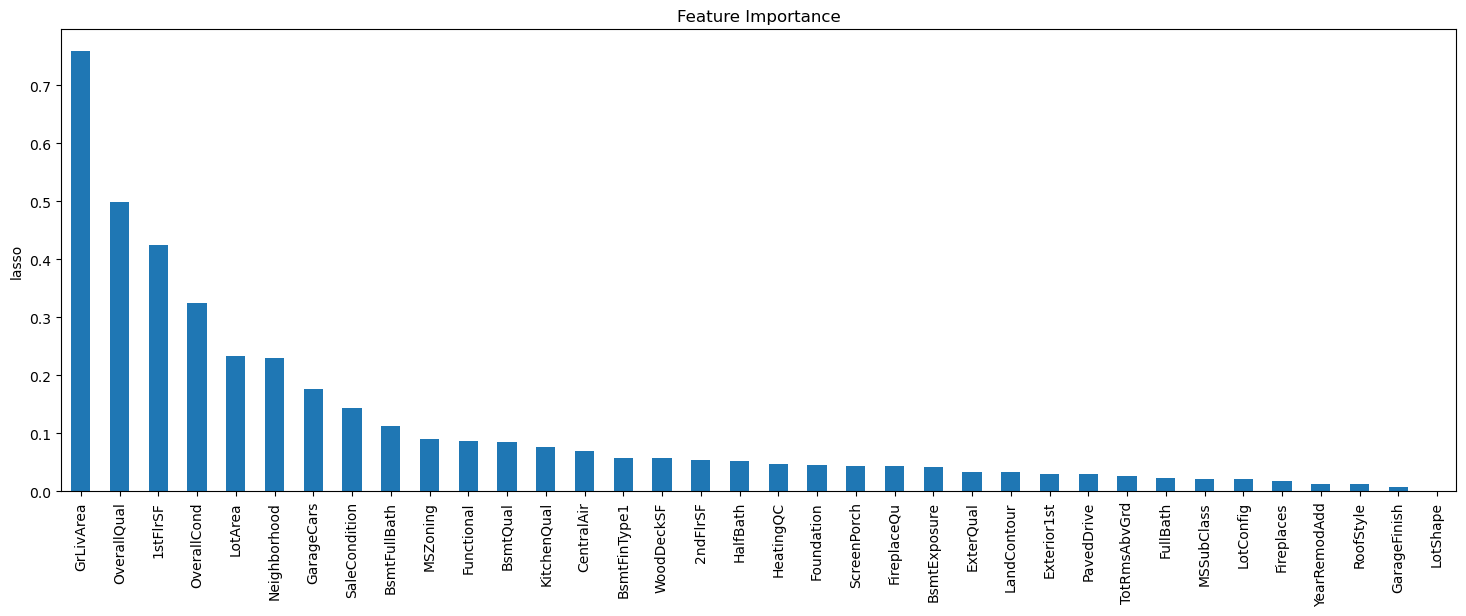

In [267]:
importance = pd.Series(np.abs(lasso_best.coef_.ravel()))
importance.index = lasso_important_features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('lasso')
plt.title('Feature Importance')

In [271]:
importance

GrLivArea        0.758292
OverallQual      0.498501
1stFlrSF         0.424401
OverallCond      0.324838
LotArea          0.232544
Neighborhood     0.230003
GarageCars       0.176686
SaleCondition    0.143448
BsmtFullBath     0.112246
MSZoning         0.090671
Functional       0.086818
BsmtQual         0.085137
KitchenQual      0.076771
CentralAir       0.069486
BsmtFinType1     0.058016
WoodDeckSF       0.058008
2ndFlrSF         0.053551
HalfBath         0.052848
HeatingQC        0.046809
Foundation       0.045820
ScreenPorch      0.044229
FireplaceQu      0.043182
BsmtExposure     0.041327
ExterQual        0.034145
LandContour      0.032669
Exterior1st      0.030465
PavedDrive       0.029456
TotRmsAbvGrd     0.026167
FullBath         0.022360
MSSubClass       0.020933
LotConfig        0.020539
Fireplaces       0.017982
YearRemodAdd     0.013316
RoofStyle        0.013158
GarageFinish     0.007545
LotShape         0.001379
dtype: float64

In [270]:
k